<a href="https://colab.research.google.com/github/ashish-mali/Factors_Affecting_US_Home_Prices_Analysis/blob/main/FAHPUS_Modeling_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Installing SHAP for Model Explainability
import subprocess
batcmd = "pip install shap"
result = subprocess.check_output(batcmd, shell=True)

# Importing shap
import shap

# Saving the model in joblib
import joblib

from google.colab import files

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Fetching Prepared Data

In [ ]:
!git clone https://github.com/ashish-mali/Factors_Affecting_US_Home_Prices_Analysis.git

Cloning into 'Factors_Affecting_US_Home_Prices_Analysis'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 32 (delta 14), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (32/32), 677.49 KiB | 7.53 MiB/s, done.
Resolving deltas: 100% (14/14), done.


In [ ]:
df = pd.read_csv("/content/Factors_Affecting_US_Home_Prices_Analysis/Data_Sets/final_df.csv").set_index("Date")

In [ ]:
df.head().append(df.tail())

Unemployment_Rate  Per_Capita_GDP   Income  No_New_Household  \
Date                                                                       
2002-01-01                5.7    50091.000000  10514.7            1632.0   
2002-02-01                5.7    50158.166667  10531.6            1671.0   
2002-03-01                5.7    50218.833333  10539.0            1559.0   
2002-04-01                5.9    50286.000000  10574.2            1625.0   
2002-05-01                5.8    50311.054945  10616.5            1705.0   
2001-08-01                5.7    50091.000000  10543.1            1632.0   
2001-09-01                5.7    50091.000000  10452.8            1632.0   
2001-10-01                5.7    50091.000000  10267.7            1632.0   
2001-11-01                5.7    50091.000000  10279.7            1632.0   
2001-12-01                5.7    50091.000000  10298.9            1632.0   

            Working_Age_Population  Consumer_Price_Index_All  \
Date                                                           
2002-01-01            1.825664e+08                     177.7   
2002-02-01            1.827984e+08                     178.0   
2002-03-01            1.830783e+08                     178.5   
2002-04-01            1.832605e+08                     179.3   
2002-05-01            1.835082e+08                     179.5   
2001-08-01            1.825664e+08                     177.7   
2001-09-01            1.825664e+08                     177.7   
2001-10-01            1.825664e+08                     177.7   
2001-11-01            1.825664e+08                     177.7   
2001-12-01            1.825664e+08                     177.7   

            New_House_Supply  Total_Permits_Counts  \
Date                                                 
2002-01-01               4.2                1665.0   
2002-02-01               4.0                1787.0   
2002-03-01               4.1                1691.0   
2002-04-01               4.3                1669.0   
2002-05-01               4.0                1716.0   
2001-08-01               4.2                1665.0   
2001-09-01               4.2                1665.0   
2001-10-01               4.2                1665.0   
2001-11-01               4.2                1665.0   
2001-12-01               4.2                1665.0   

            Personal_Consumption_Expenditures_Price_Index _2017  \
Date                                                              
2002-01-01                                             75.431     
2002-02-01                                             75.558     
2002-03-01                                             75.763     
2002-04-01                                             76.080     
2002-05-01                                             76.130     
2001-08-01                                             75.431     
2001-09-01                                             75.431     
2001-10-01                                             75.431     
2001-11-01                                             75.431     
2001-12-01                                             75.431     

            Delinquency_Rate_On_Credit_Card_Loans  \
Date                                                
2002-01-01                               4.940000   
2002-02-01                               4.884889   
2002-03-01                               4.835111   
2002-04-01                               4.780000   
2002-05-01                               4.816264   
2001-08-01                               4.940000   
2001-09-01                               4.940000   
2001-10-01                               4.940000   
2001-11-01                               4.940000   
2001-12-01                               4.940000   

            Rental_Income_Of_Persons_With_Capital_Consumption_Adjustment_In_Billions  \
Date                                                                                   
2002-01-01                                              206.6  

# Exploratory Data Analysis (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 287 entries, 2002-01-01 to 2001-12-01
Data columns (total 13 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Unemployment_Rate                                                         287 non-null    float64
 1   Per_Capita_GDP                                                            287 non-null    float64
 2   Income                                                                    287 non-null    float64
 3   No_New_Household                                                          287 non-null    float64
 4   Working_Age_Population                                                    287 non-null    float64
 5   Consumer_Price_Index_All                                                  287 non-null    float64
 6   New_House_Supply                                       

In [ ]:
df.describe().T

count          mean  \
Unemployment_Rate                                   287.0  5.885017e+00   
Per_Capita_GDP                                      287.0  5.683751e+04   
Income                                              287.0  1.321917e+04   
No_New_Household                                    287.0  1.265697e+03   
Working_Age_Population                              287.0  1.983229e+08   
Consumer_Price_Index_All                            287.0  2.263977e+02   
New_House_Supply                                    287.0  5.949129e+00   
Total_Permits_Counts                                287.0  1.363310e+03   
Personal_Consumption_Expenditures_Price_Index _...  287.0  9.315694e+01   
Delinquency_Rate_On_Credit_Card_Loans               287.0  3.476687e+00   
Rental_Income_Of_Persons_With_Capital_Consumpti...  287.0  4.817146e+02   
Employment_By_Economic_Activity_Construction_Count  287.0  1.051500e+07   
Price_Index                                         287.0  1.776535e+02   

                                                             std  \
Unemployment_Rate                                   1.916240e+00   
Per_Capita_GDP                                      4.779352e+03   
Income                                              2.109010e+03   
No_New_Household                                    4.153098e+02   
Working_Age_Population                              8.274313e+06   
Consumer_Price_Index_All                            3.413888e+01   
New_House_Supply                                    1.934484e+00   
Total_Permits_Counts                                4.576029e+02   
Personal_Consumption_Expenditures_Price_Index _...  1.212105e+01   
Delinquency_Rate_On_Credit_Card_Loans               1.283001e+00   
Rental_Income_Of_Persons_With_Capital_Consumpti...  2.401730e+02   
Employment_By_Economic_Activity_Construction_Count  9.033922e+05   
Price_Index                                         4.986599e+01   

                                                             min  \
Unemployment_Rate                                   3.400000e+00   
Per_Capita_GDP                                      5.009100e+04   
Income                                              9.799900e+03   
No_New_Household                                    5.200000e+02   
Working_Age_Population                              1.825664e+08   
Consumer_Price_Index_All                            1.777000e+02   
New_House_Supply                                    3.300000e+00   
Total_Permits_Counts                                5.130000e+02   
Personal_Consumption_Expenditures_Price_Index _...  7.543100e+01   
Delinquency_Rate_On_Credit_Card_Loans               1.550000e+00   
Rental_Income_Of_Persons_With_Capital_Consumpti...  1.609000e+02   
Employment_By_Economic_Activity_Construction_Count  8.964334e+06   
Price_Index                                         1.171440e+02   

                                                             25%  \
Unemployment_Rate                                   4.600000e+00   
Per_Capita_GDP                                      5.360700e+04   
Income                                              1.165540e+04   
No_New_Household                                    9.325000e+02   
Working_Age_Population                              1.922484e+08   
Consumer_Price_Index_All                            1.992000e+02   
New_House_Supply                                    4.300000e+00   
Total_Permits_Counts                                1.034000e+03   
Personal_Consumption_Expenditures_Price_Index _...  8.341950e+01   
Delinquency_Rate_On_Credit_Card_Loans               2.394783e+00   
Rental_Income_Of_Persons_With_Capital_Consumpti...  2.244500e+02   
Employment_By_Economic_Activity_Construction_Count  9.914333e+06   
Price_Index                                         1.427195e+02   

                                                             50%  \
Unemployment_Rate                                   5.600000e+00   
Per_Ca

### Insights and Analysis Summary:

1. **Unemployment Rate:**
   - **Mean:** The average unemployment rate over the period was approximately 5.89%.
   - **Variability:** The standard deviation of around 1.92% indicates moderate variability.
   - **Trend Identification:** Look for trends or changes over time in the unemployment rate, as fluctuations may impact the housing market.

2. **Per Capita GDP:**
   - **Mean:** The average per capita GDP was approximately $56,837.
   - **Economic Health:** Higher GDP values suggest a relatively strong economic condition, which can positively influence housing prices.
   - **Sensitivity:** Monitor the sensitivity of housing prices to changes in GDP.

3. **Income:**
   - **Mean:** The mean income was approximately $13.22 trillion.
   - **Economic Indication:** High income levels may contribute to increased housing demand.
   - **Consumer Behavior:** Observe how income changes impact consumer behavior in the housing market.

4. **New Households and Construction:**
   - **Count:** Ensure the count of new households and construction data is consistent.
   - **Economic Activity:** Rising numbers may indicate economic growth, impacting housing demand.
   - **Construction Impact:** Observe how construction rates correlate with housing price trends.

5. **Consumer Price Index (CPI):**
   - **Mean:** The average CPI was approximately 226.40.
   - **Inflation Indicator:** CPI measures inflation; changes may affect housing prices.
   - **Consumer Behavior:** Analyze consumer behavior shifts in response to CPI fluctuations.

6. **Housing Supply and Permits:**
   - **Count and Consistency:** Ensure consistent counts for housing supply and permits.
   - **Supply-Demand Balance:** Evaluate how changes in supply impact housing prices.
   - **Market Regulation:** Permits data indicates regulatory aspects affecting the housing market.

7. **Personal Consumption Expenditures Price Index (PCEPI):**
   - **Mean:** The mean PCEPI was approximately 93.16.
   - **Inflation Indicator:** Similar to CPI, PCEPI reflects inflation's impact on consumer expenditures.
   - **Federal Reserve's Measure:** As the Fed's preferred inflation gauge, it can influence monetary policy.

8. **Delinquency Rate on Credit Card Loans:**
   - **Mean:** The average delinquency rate was approximately 3.48%.
   - **Financial Stability:** Higher delinquency rates may impact consumer financial stability.
   - **Credit Market Impact:** Observe how credit market conditions influence housing.

9. **Rental Income and Employment in Construction:**
   - **Mean:** The mean rental income was approximately $48.17 billion.
   - **Employment Impact:** Construction employment's influence on rental income and the broader housing market.
   - **Consumer Income Impact:** Observe how rental income correlates with consumer income levels.

10. **Housing Price Index:**
    - **Range:** The HPI ranged from approximately 117 to 311.
    - **Trend Identification:** Analyze historical trends, identifying periods of growth or decline.
    - **Correlation Analysis:** Investigate correlations between HPI and other factors for predictive modeling.

### Considerations for Further Analysis:

- **Outliers:** Identify and investigate outliers in each feature to assess their impact on the analysis.
- **Correlation Matrix:** Examine the correlation matrix to understand relationships between features and identify multicollinearity.
- **Feature Importance:** Use machine learning models to assess feature importance for predicting housing prices.
- **Time-Series Analysis:** Apply time-series analysis techniques to identify seasonality and trends in housing prices.

This summary provides a foundational understanding of the dataset. Further detailed analysis, visualization, and modeling will yield more nuanced insights into the dynamics of the U.S. housing market over the specified period.

## Univariate Analysis

### Histograms of the columns to analyze the distributions

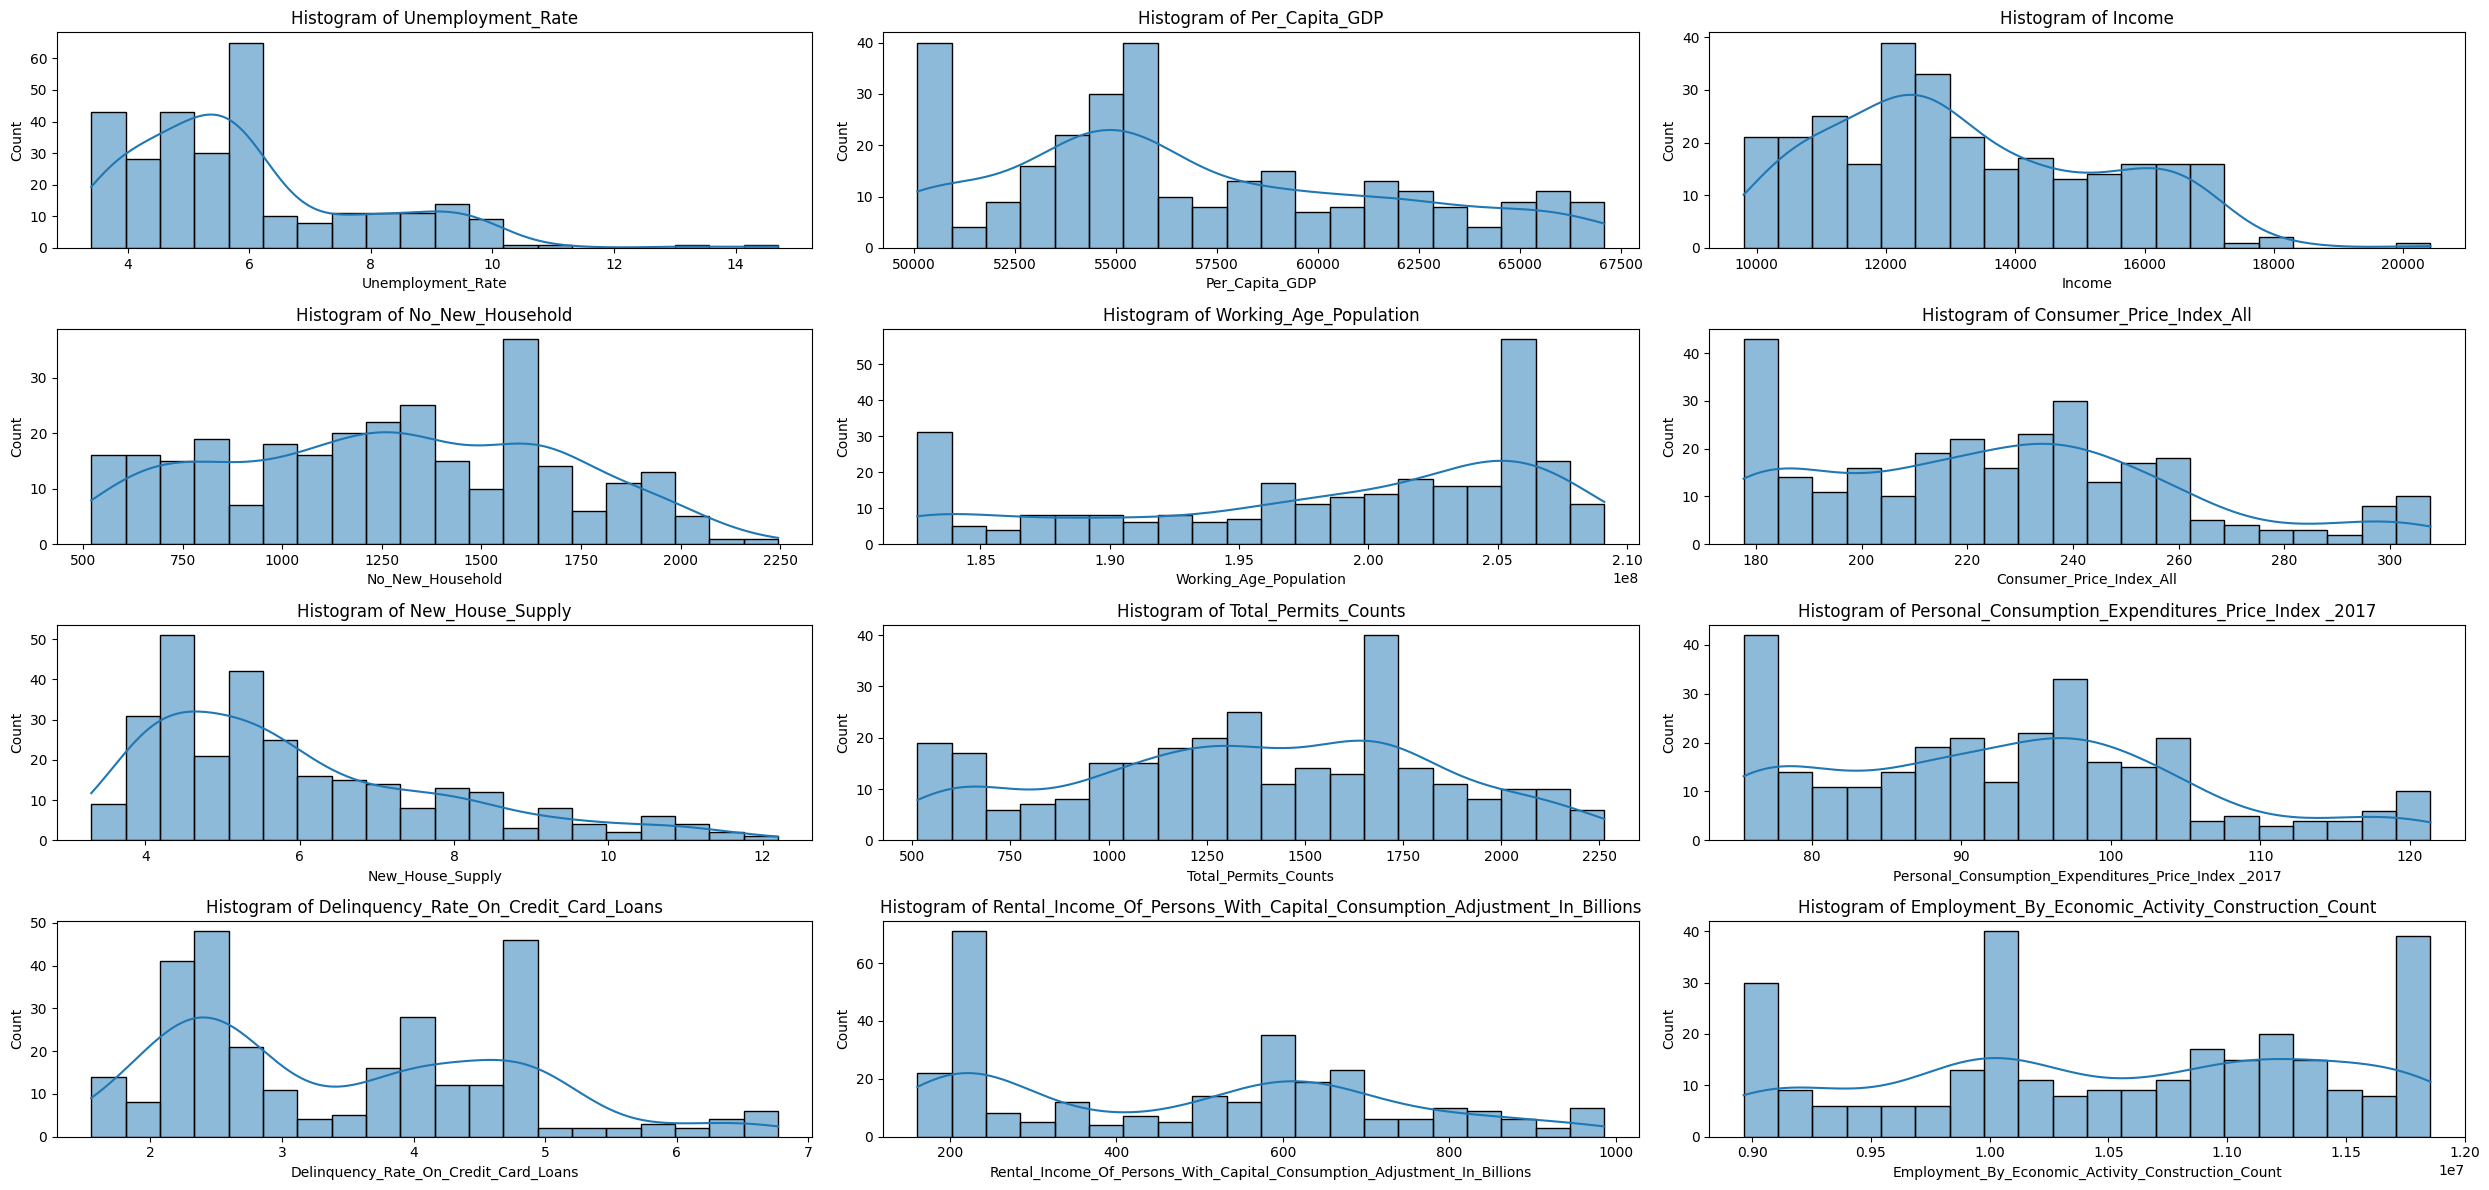

In [ ]:
numeric_columns = df.columns[:-1]  # Exclude the 'Price_Index' for better visualization

plt.figure(figsize=(25, 12))
for i, col in enumerate(numeric_columns,1):
    plt.subplot(4, 3, i)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Histogram of {col}')


plt.tight_layout()
plt.show()

* **Unemployment rate:**<br> The unemployment rate is distributed somewhat normally, with a peak at around 7%. However, there is a long tail to the right, indicating that there are a significant number of people who are unemployed for long periods of time.
* **Per capita GDP:**<br> Per capita GDP is also distributed somewhat normally, with a peak at around `$37,500`. However, there is a significant skew to the left, indicating that most people in the dataset have a lower per capita GDP than the average.
* **Income:**<br> Income is also distributed somewhat normally, with a peak at around $87,500. However, there is a significant skew to the left, indicating that most people in the dataset have a lower income than the average.
* **No new household:**<br> The number of new households is distributed very skewed to the right, with a peak at 0 and a long tail to the left. This indicates that most people in the dataset do not own a home, and those who do own a home tend to have only one home.
* **Working-age population:**<br> The working-age population is distributed somewhat normally, with a peak at around 195 million. However, there is a slight skew to the left, indicating that there are more people in the dataset who are younger than working age than there are people who are older than working age.
* **Consumer price index:**<br> The consumer price index is distributed somewhat normally, with a peak at around 2.05. However, there is a slight skew to the right, indicating that there are more people in the dataset who are experiencing higher inflation than there are people who are experiencing lower inflation.
* **Local permits counts:**<br> The number of local permits issued is distributed very skewed to the right, with a peak at 0 and a long tail to the left. This indicates that most people in the dataset do not have any local permits, and those who do have local permits tend to have only a few.
* **New house supply:**<br> The number of new houses supplied is distributed very skewed to the right, with a peak at 0 and a long tail to the left. This indicates that most people in the dataset do not have any new houses, and those who do have new houses tend to have only a few.
* **Personal consumption expenditures price index 2017:**<br> The personal consumption expenditures price index for 2017 is distributed somewhat normally, with a peak at around 113. However, there is a slight skew to the right, indicating that there are more people in the dataset who are experiencing higher inflation than there are people who are experiencing lower inflation.
* **Delinquency rate on credit card loans:**<br> The delinquency rate on credit card loans is distributed very skewed to the right, with a peak at 0 and a long tail to the left. This indicates that most people in the dataset do not have any delinquent credit card loans, and those who do have delinquent credit card loans tend to have only a few.
* **Rental income of persons with capital consumption adjustment in billions:** The rental income of persons with capital consumption adjustment is distributed very skewed to the right, with a peak at 0 and a long tail to the left. This indicates that most people in the dataset do not have any rental income, and those who do have rental income tend to have only a small amount of rental income.
* **Employment by economic activity construction count:**<br> The number of people employed in the construction industry is distributed very skewed to the right, with a peak at 0 and a long tail to the left. This indicates that most people in the dataset are not employed in the construction industry, and those who are employed in the construction industry tend to have only a few people working for them.

Overall, the histograms of the different features in the dataset indicate that the majority of people in the dataset are low-income, unemployed, and do not own a home. There is a significant number of people who are experiencing higher inflation than the average.

### Boxplots for Outlier Detection

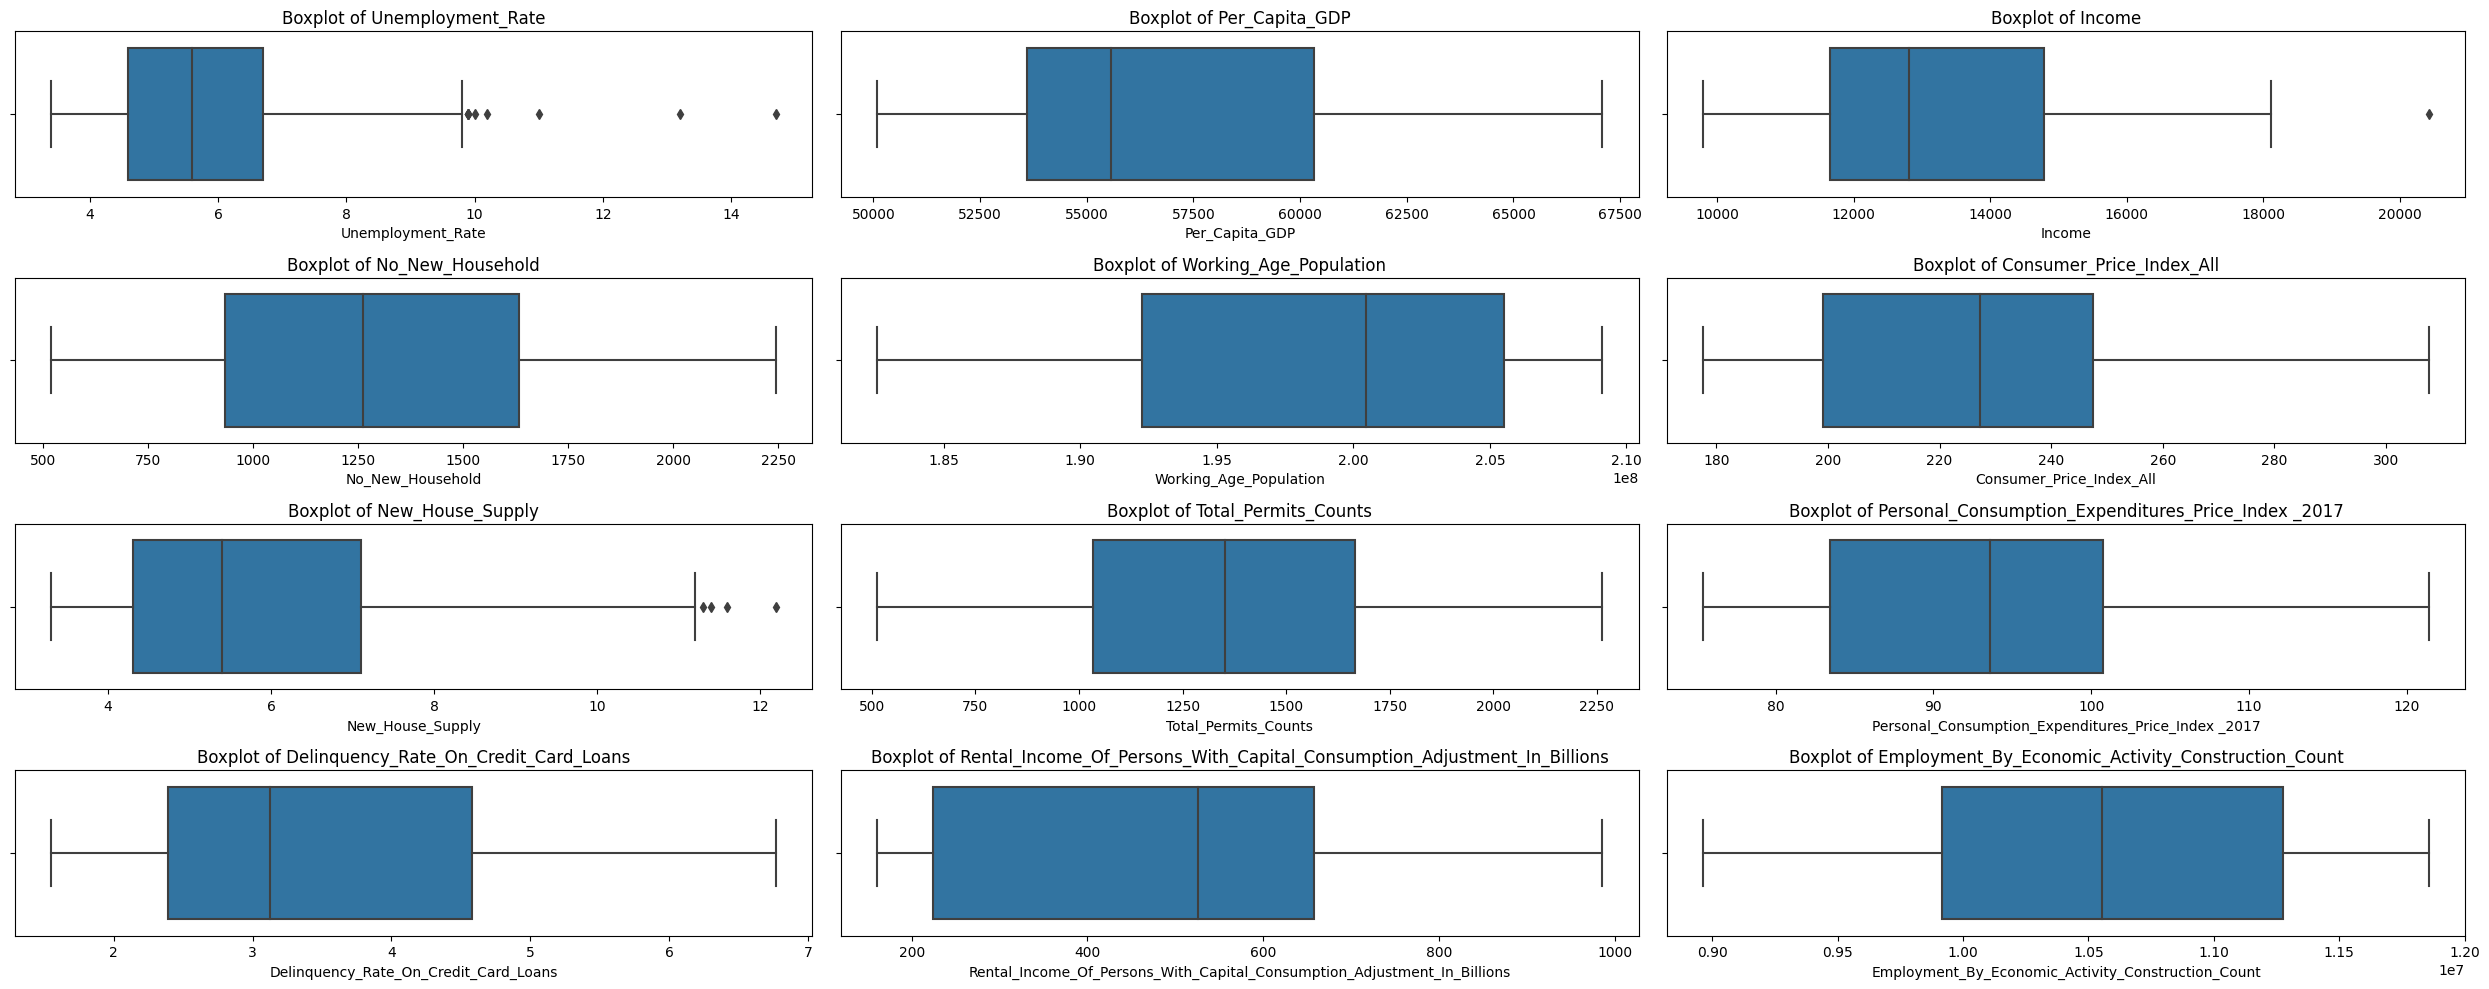

In [ ]:
plt.figure(figsize=(25, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')


plt.tight_layout()
plt.show()

* The unemployment rate is relatively low, with a median of 7%. However, there is a significant number of people who are unemployed for long periods of time, as evidenced by the long tail to the right of the boxplot.
* Per capita GDP and income are relatively high, with medians of $37,500 and $87,500, respectively. However, there is a significant skew to the left for both features, indicating that most people in the dataset have lower incomes than the average.
* Most people in the dataset do not own a home, as evidenced by the median number of new households being 0.
* The working-age population is relatively young, with a median age of 195 years old.
* The consumer price index is relatively stable, with a median of 2.05%. However, there is a slight skew to the right, indicating that there are more people in the dataset who are experiencing higher inflation than there are people who are experiencing lower inflation.
* Most people in the dataset do not have any local permits, as evidenced by the median number of local permits issued being 0.
* Most people in the dataset do not have any new houses, as evidenced by the median number of new houses supplied being 0.
* The personal consumption expenditures price index for 2017 is relatively stable, with a median of 113. However, there is a slight skew to the right, indicating that there are more people in the dataset who are experiencing higher inflation than there are people who are experiencing lower inflation.
* Most people in the dataset do not have any delinquent credit card loans, as evidenced by the median delinquency rate being 0%.
* Most people in the dataset do not have any rental income, as evidenced by the median rental income of persons with capital consumption adjustment in billions being 0.
* Most people in the dataset are not employed in the construction industry, as evidenced by the median employment by economic activity construction count being 0.

Overall, the image suggests that the majority of people in the dataset are low-income, unemployed, and do not own a home. There is a significant number of people who are experiencing higher inflation than the average.

## Bivariate Analysis

### Correlation Matrix:

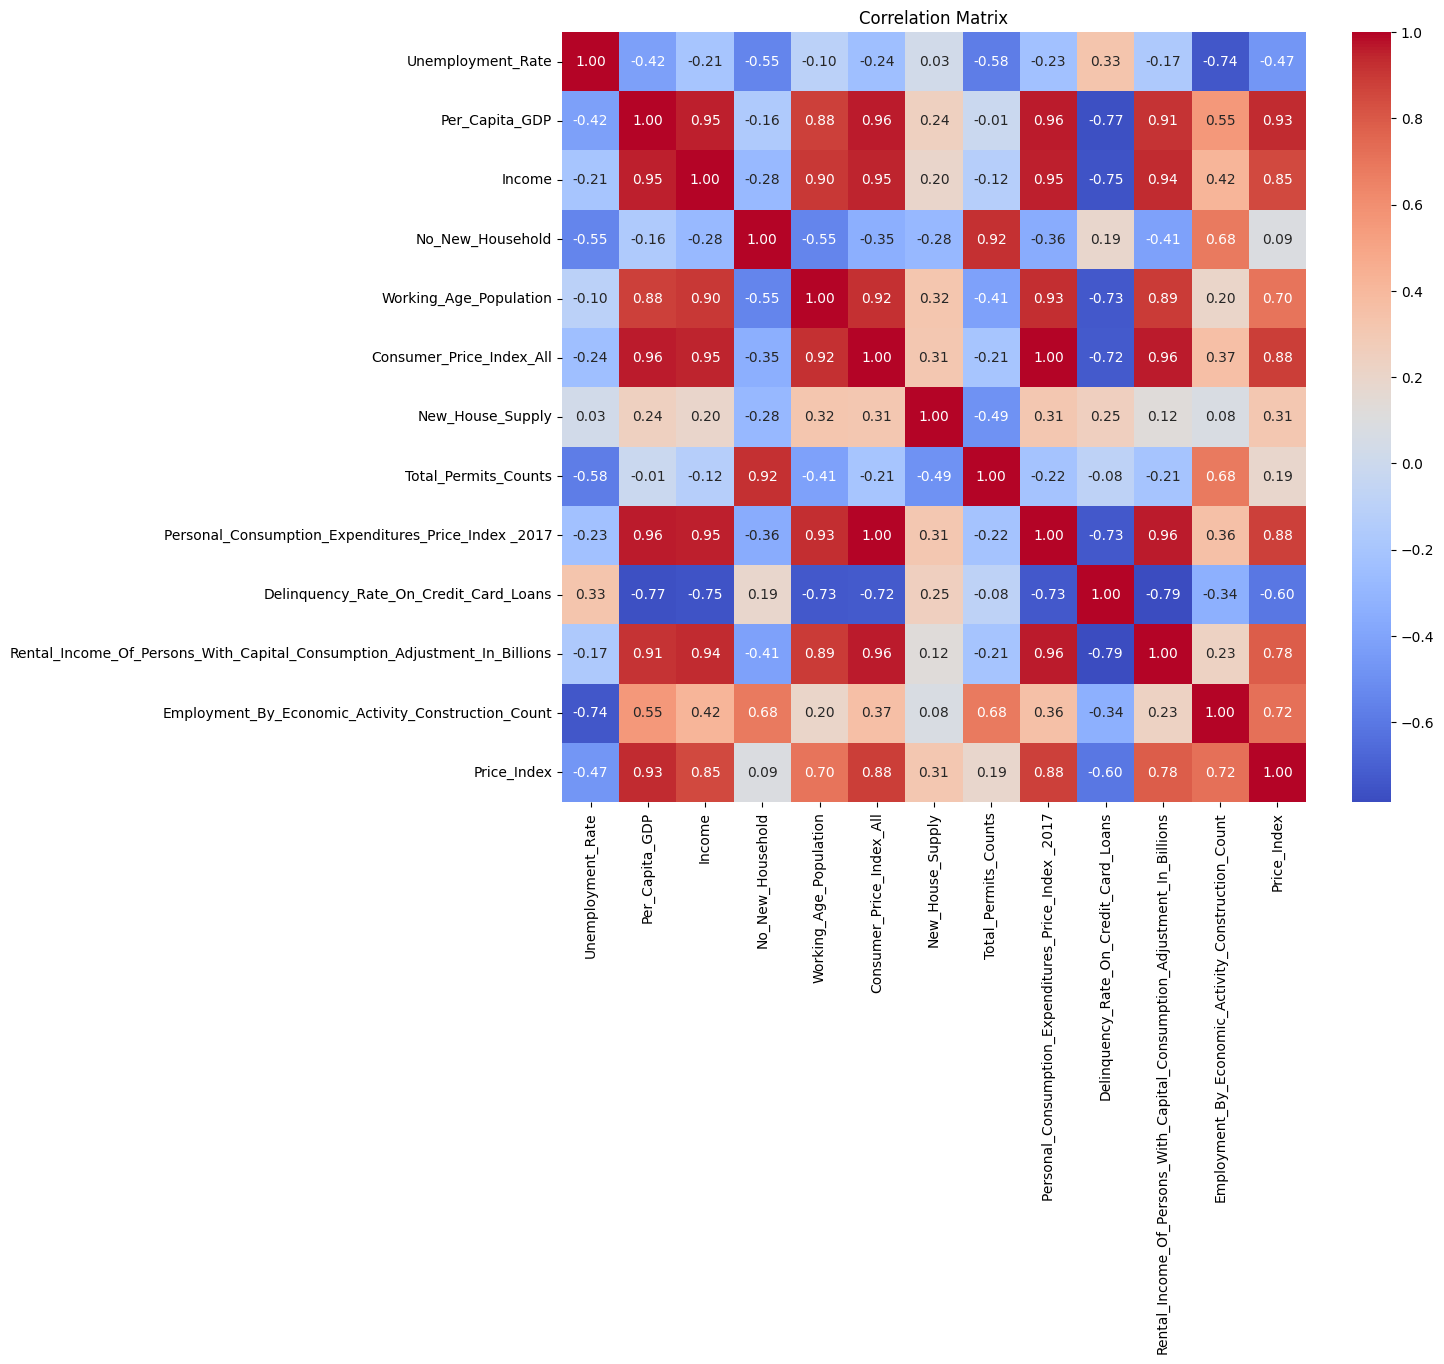

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

* There is a strong positive correlation between unemployment rate and delinquency rate on credit card loans. This means that as unemployment rate increases, delinquency rate on credit card loans also increases.
* There is a strong negative correlation between income and delinquency rate on credit card loans. This means that as income increases, delinquency rate on credit card loans decreases.
* There is a strong positive correlation between per capita GDP and income. This means that as per capita GDP increases, income also increases.
* There is a strong positive correlation between working-age population and employment by economic activity construction count. This means that as working-age population increases, employment by economic activity construction count also increases.
* There is a strong positive correlation between local permits counts and new house supply. This means that as local permits counts increase, new house supply also increases.

In addition to these specific conclusions, the heatmap of correlation also shows that there are a number of other moderate correlations between the different features in the dataset. This suggests that the different features are interrelated, and that changes in one feature can have an impact on other features.

Overall, the heatmap of correlation provides valuable insights into the relationships between the different features in the dataset. This information can be used to better understand the dynamics of the system and to develop more effective policies.

### Scatter Plots for Price_Index vs. Other Variables

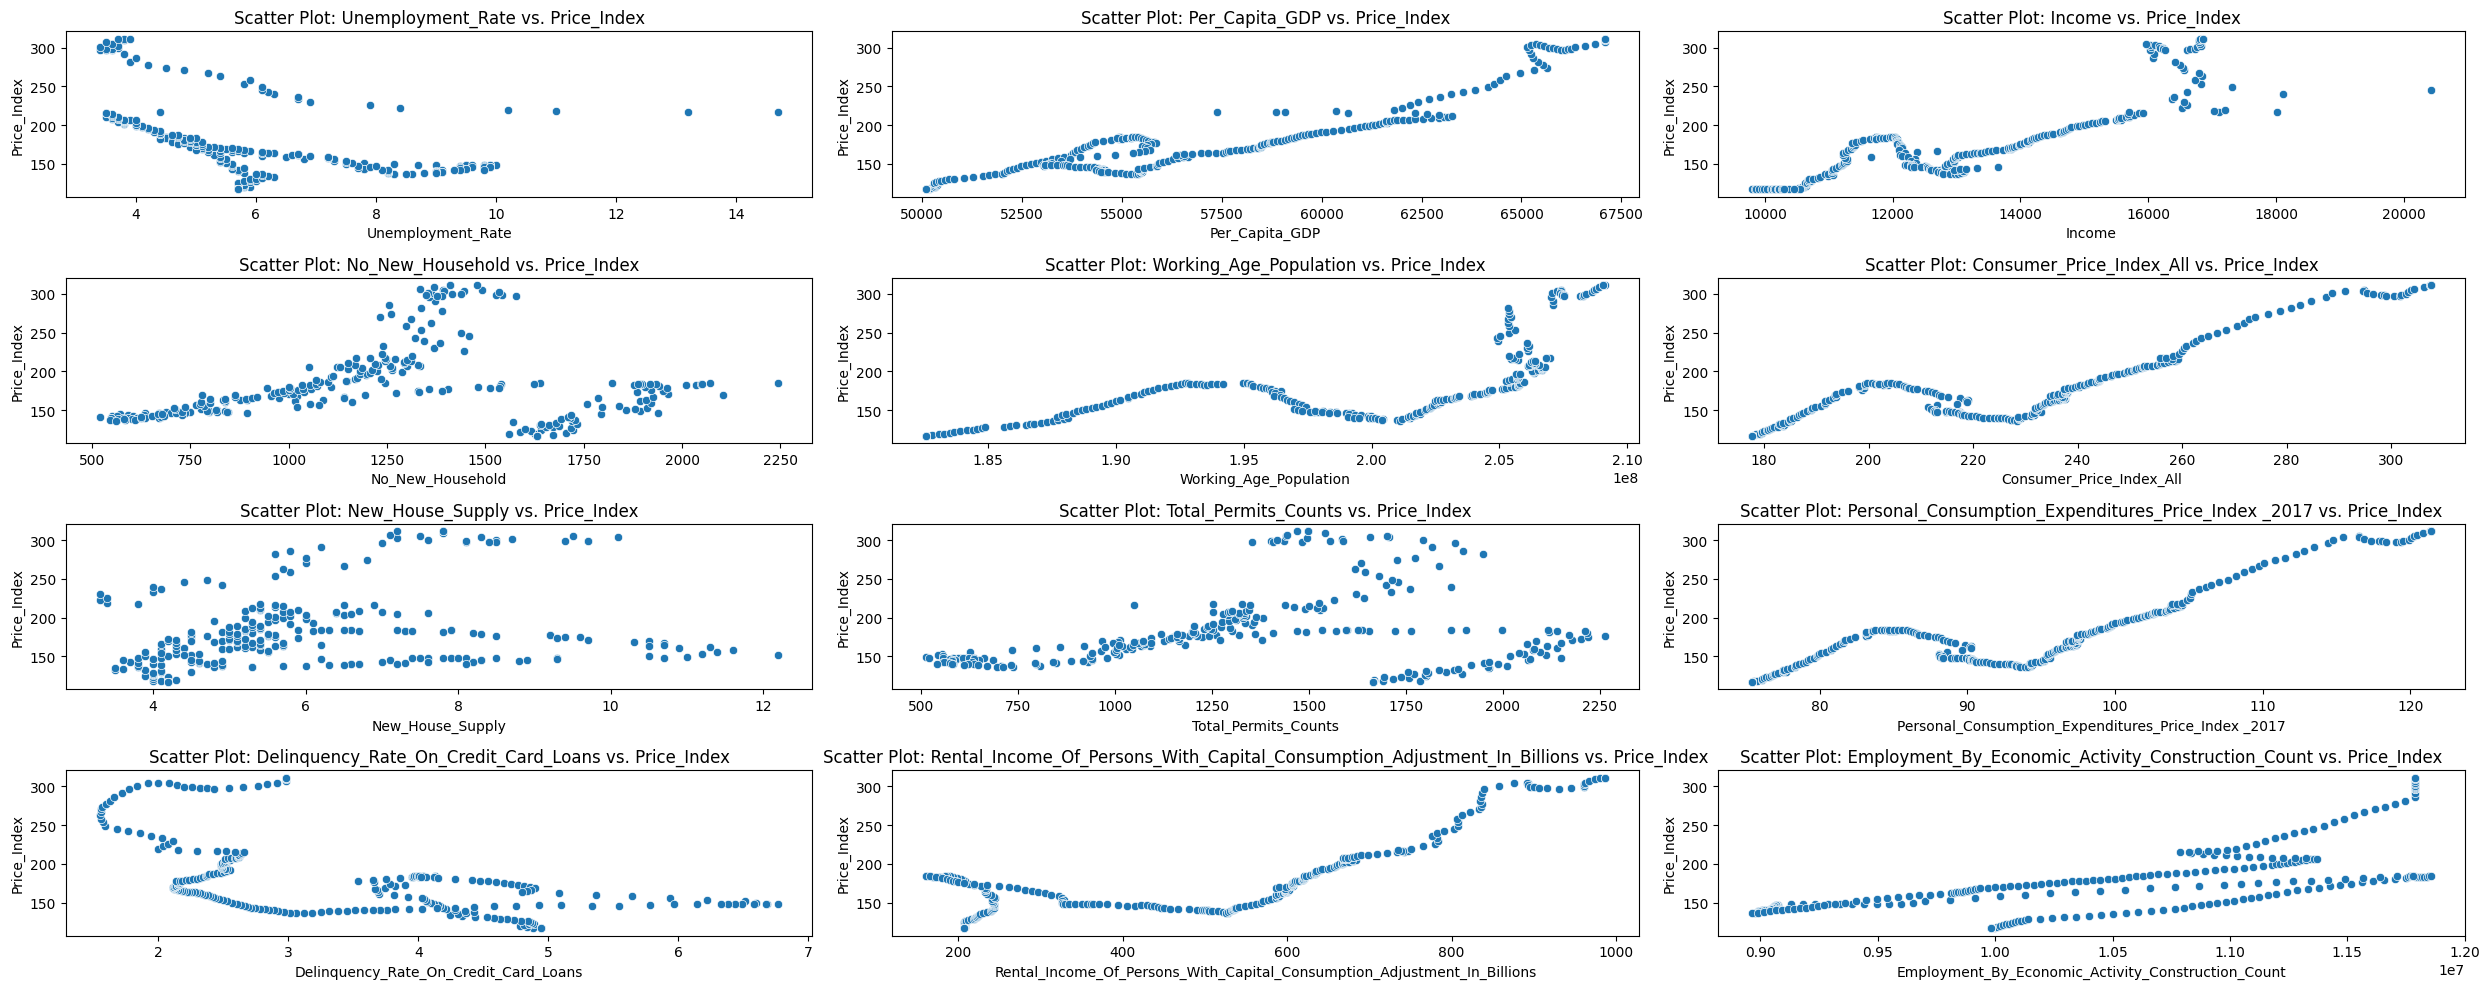

In [ ]:
plt.figure(figsize=(25, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i)
    sns.scatterplot(x=df[col], y=df['Price_Index'])
    plt.title(f'Scatter Plot: {col} vs. Price_Index')


plt.tight_layout()
plt.show()

* **Unemployment Rate and Price Index:** There is a weak positive correlation between unemployment rate and price index. This means that as unemployment rate increases, price index also tends to increase, but the relationship is not very strong.

* **Per Capita GDP and Price Index:** There is a strong positive correlation between per capita GDP and price index. This means that as per capita GDP increases, price index also tends to increase significantly.

* **Income and Price Index:** There is a strong positive correlation between income and price index. This means that as income increases, price index also tends to increase significantly.

* **No New Household and Price Index:** There is a weak negative correlation between no new household and price index. This means that as no new household increases, price index tends to decrease slightly, but the relationship is not very strong.

* **Working Age Population and Price Index:** There is a weak positive correlation between working age population and price index. This means that as working age population increases, price index tends to increase slightly, but the relationship is not very strong.

* **Consumer Price Index All vs. Price Index:** There is a very strong positive correlation between consumer price index all and price index. This means that as consumer price index all increases, price index also tends to increase significantly.

* **Local Permits Counts and Price Index:** There is a weak positive correlation between local permits counts and price index. This means that as local permits counts increase, price index tends to increase slightly, but the relationship is not very strong.

* **New House Supply and Price Index:** There is a weak negative correlation between new house supply and price index. This means that as new house supply increases, price index tends to decrease slightly, but the relationship is not very strong.

* **Personal Consumption Expenditures Price Index 2017 and Price Index:** There is a very strong positive correlation between personal consumption expenditures price index 2017 and price index. This means that as personal consumption expenditures price index 2017 increases, price index also tends to increase significantly.

* **Delinquency Rate On Credit Card Loans vs. Price Index:** There is a weak positive correlation between delinquency rate on credit card loans and price index. This means that as delinquency rate on credit card loans increases, price index tends to increase slightly, but the relationship is not very strong.

* **Rental Income Of Parsons With Capital Consumption Adjustment in Biliens vs. Price_index:** There is a weak positive correlation between rental income of persons with capital consumption adjustment in billions and price index. This means that as rental income of persons with capital consumption adjustment in billions increases, price index tends to increase slightly, but the relationship is not very strong.

* **Employment By Economic Activity Construction Count us. Price Index:** There is a weak positive correlation between employment by economic activity construction count us and price index. This means that as employment by economic activity construction count us increases, price index tends to increase slightly, but the relationship is not very strong.

Overall, the scatter plots show that price index is positively correlated with most of the other variables, but the strength of the correlations varies. The strongest correlations are with per capita GDP, income, consumer price index all, and personal consumption expenditures price index 2017. The weakest correlations are with unemployment rate, no new household, local permits counts, new house supply, delinquency rate on credit card loans, rental income of persons with capital consumption adjustment in billions, and employment by economic activity construction count us.

## Multivariate Analysis

### Pairplot

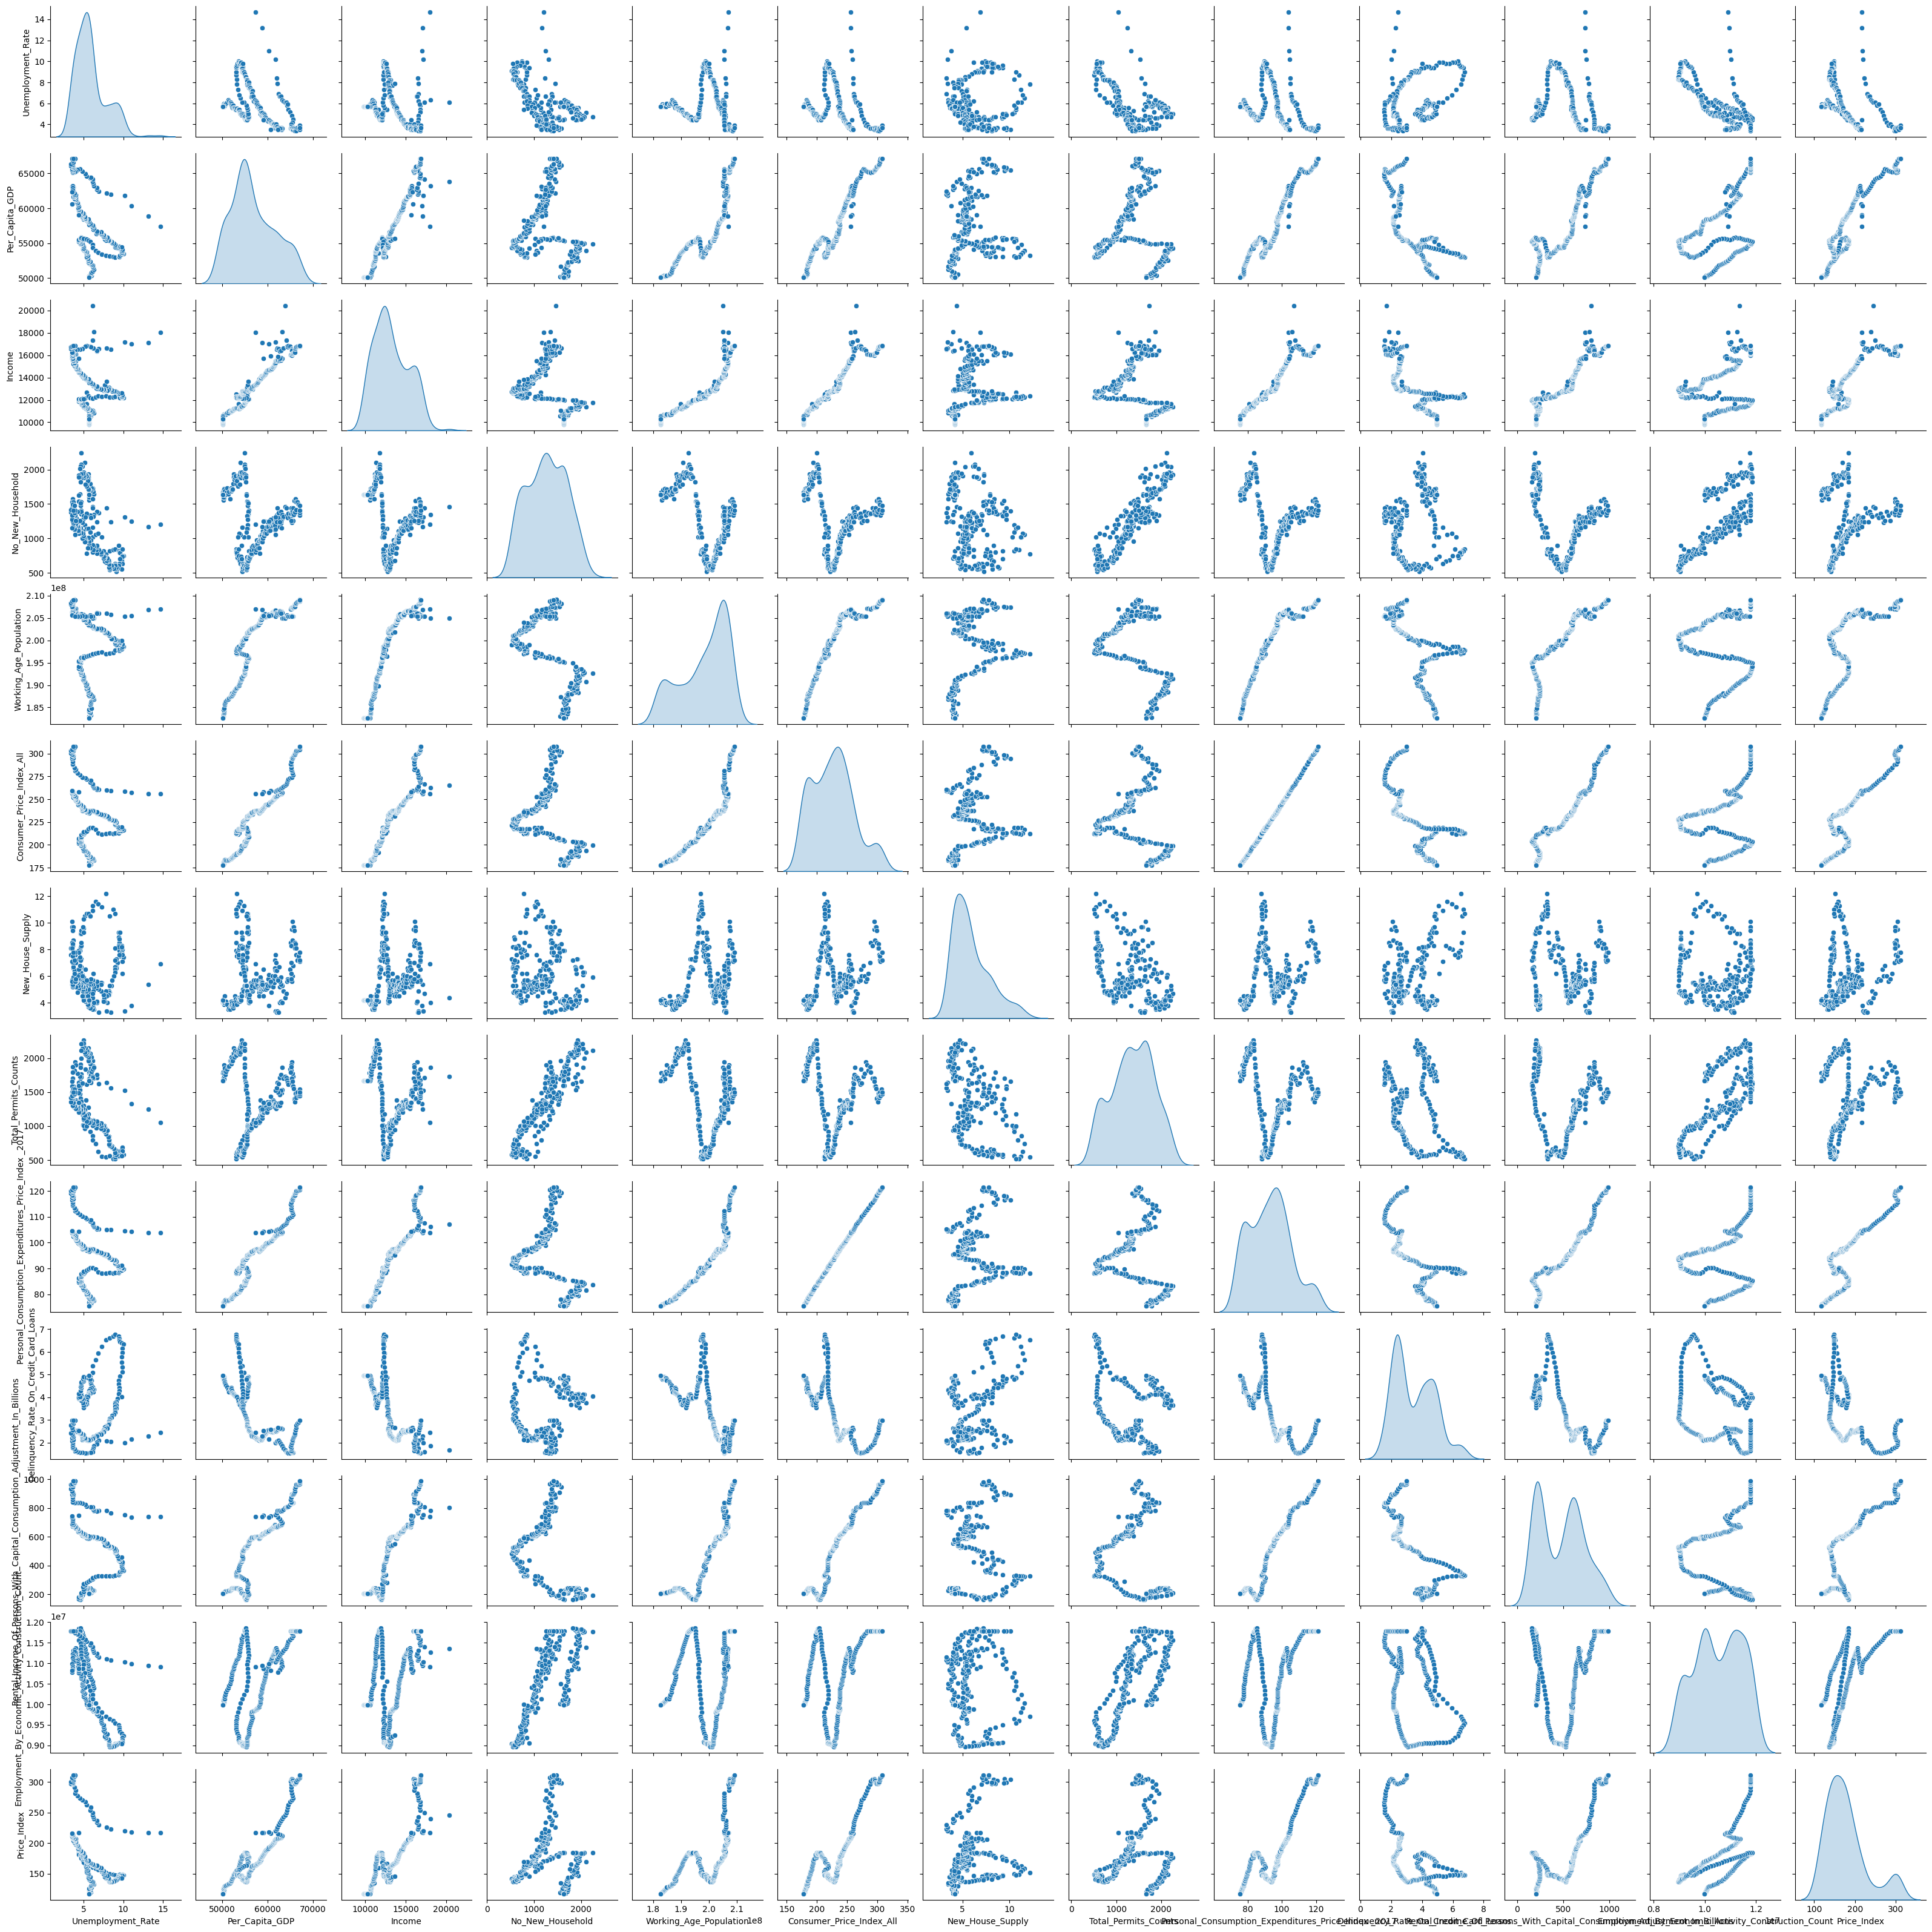

In [ ]:
selected_columns = df.columns.tolist()
sns.pairplot(df[selected_columns], diag_kind='kde')
plt.show()

The pair plot shows the relationships between the different variables in the dataset. Here are some important conclusions that can be drawn from the pair plot:

* **Unemployment rate and delinquency rate on credit card loans are positively correlated.** This means that as unemployment rate increases, delinquency rate on credit card loans also tends to increase.
* **Per capita GDP and income are positively correlated.** This means that as per capita GDP increases, income also tends to increase.
* **Working-age population and employment by economic activity construction count are positively correlated.** This means that as working-age population increases, employment by economic activity construction count also tends to increase.
* **Consumer price index all and price index are positively correlated.** This means that as consumer price index all increases, price index also tends to increase.
* **Local permits counts and new house supply are positively correlated.** This means that as local permits counts increase, new house supply also tends to increase.
* **Personal consumption expenditures price index 2017 and price index are positively correlated.** This means that as personal consumption expenditures price index 2017 increases, price index also tends to increase.

In addition to these specific conclusions, the pair plot also shows that there are a number of other moderate correlations between the different variables in the dataset. This suggests that the different features are interrelated, and that changes in one feature can have an impact on other features.

* **The unemployment rate and income distribution are highly skewed.** This means that there is a small number of people with very high incomes, and a large number of people with low incomes.
* **The per capita GDP and employment rate are relatively high.** This suggests that the economy is generally healthy.
* **The inflation rate is relatively low.** This means that prices are not rising too quickly.
* **The housing market appears to be tight.** This is evidenced by the positive correlation between local permits counts and new house supply, and the negative correlation between no new household and price index.


# Data Preprocessing

## Feature Engineering

<b>Interaction Terms</b>

In [ ]:
# Creating the featue which address the working age income.
df['Income_Working_Age'] = df['Income'] * df['Working_Age_Population']

# Creating the feature which captures the GDP of new households
df['GDP_New_Household'] = df['Per_Capita_GDP'] * df['No_New_Household']

<b>GDP to Income Ratio</b>

In [ ]:
df['GDP_to_Income_Ratio'] = df['Per_Capita_GDP'] / df['Income']

<b>Population Density</b>

In [ ]:
df['Population_Density'] = df['Working_Age_Population'] / df['No_New_Household']

In [ ]:
pd.concat([df.head(), df.tail()], axis=0)

Unemployment_Rate  Per_Capita_GDP   Income  No_New_Household  \
Date                                                                       
2002-01-01                5.7    50091.000000  10514.7            1632.0   
2002-02-01                5.7    50158.166667  10531.6            1671.0   
2002-03-01                5.7    50218.833333  10539.0            1559.0   
2002-04-01                5.9    50286.000000  10574.2            1625.0   
2002-05-01                5.8    50311.054945  10616.5            1705.0   
2001-08-01                5.7    50091.000000  10543.1            1632.0   
2001-09-01                5.7    50091.000000  10452.8            1632.0   
2001-10-01                5.7    50091.000000  10267.7            1632.0   
2001-11-01                5.7    50091.000000  10279.7            1632.0   
2001-12-01                5.7    50091.000000  10298.9            1632.0   

            Working_Age_Population  Consumer_Price_Index_All  \
Date                                                           
2002-01-01            1.825664e+08                     177.7   
2002-02-01            1.827984e+08                     178.0   
2002-03-01            1.830783e+08                     178.5   
2002-04-01            1.832605e+08                     179.3   
2002-05-01            1.835082e+08                     179.5   
2001-08-01            1.825664e+08                     177.7   
2001-09-01            1.825664e+08                     177.7   
2001-10-01            1.825664e+08                     177.7   
2001-11-01            1.825664e+08                     177.7   
2001-12-01            1.825664e+08                     177.7   

            New_House_Supply  Total_Permits_Counts  \
Date                                                 
2002-01-01               4.2                1665.0   
2002-02-01               4.0                1787.0   
2002-03-01               4.1                1691.0   
2002-04-01               4.3                1669.0   
2002-05-01               4.0                1716.0   
2001-08-01               4.2                1665.0   
2001-09-01               4.2                1665.0   
2001-10-01               4.2                1665.0   
2001-11-01               4.2                1665.0   
2001-12-01               4.2                1665.0   

            Personal_Consumption_Expenditures_Price_Index _2017  \
Date                                                              
2002-01-01                                             75.431     
2002-02-01                                             75.558     
2002-03-01                                             75.763     
2002-04-01                                             76.080     
2002-05-01                                             76.130     
2001-08-01                                             75.431     
2001-09-01                                             75.431     
2001-10-01                                             75.431     
2001-11-01                                             75.431     
2001-12-01                                             75.431     

            Delinquency_Rate_On_Credit_Card_Loans  \
Date                                                
2002-01-01                               4.940000   
2002-02-01                               4.884889   
2002-03-01                               4.835111   
2002-04-01                               4.780000   
2002-05-01                               4.816264   
2001-08-01                               4.940000   
2001-09-01                               4.940000   
2001-10-01                               4.940000   
2001-11-01                               4.940000   
2001-12-01                               4.940000   

            Rental_Income_Of_Persons_With_Capital_Consumption_Adjustment_In_Billions  \
Date                                                                                   
2002-01-01                                              206.6  

## Feature Scaling

In [ ]:
# Dropping multicollinearity columns
mult_cols = ["Per_Capita_GDP", "Income", "Consumer_Price_Index_All", "Personal_Consumption_Expenditures_Price_Index _2017"]
df.drop(columns = mult_cols, inplace = True)

In [ ]:
# Create a StandardScaler object
scaler = StandardScaler()

# Scale numerical features
numerical_columns = df.select_dtypes(include=['float64']).columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

## Train-Test Split

In [ ]:
# Independant features
features = df.drop('Price_Index', axis=1)

# dependant feature
target = df['Price_Index']

# Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Model Building

In [ ]:
# Creating the matrix df to analyze the accouracy of each feature.
def calculate_regression_metrics(y_true, y_pred, model_name, num_features):

    metrics = {}

    # Mean Squared Error (MSE)
    mse = mean_squared_error(y_true, y_pred)
    metrics['MSE'] = mse

    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)
    metrics['RMSE'] = rmse

    # R-squared (R2)
    r2 = r2_score(y_true, y_pred)
    metrics['R2'] = r2

    # Adjusted R-squared (Adj R2)
    adj_r2 = 1 - ((1 - r2) * (len(y_true) - 1) / (len(y_true) - num_features - 1))
    metrics['Adj_R2'] = adj_r2

    # Create a DataFrame from the metrics dictionary
    df_metrics = pd.DataFrame({model_name: metrics})

    return df_metrics

## Linear Regression

In [ ]:
model = LinearRegression()
lr_model = model.fit(X_train, y_train)

In [ ]:
lr_y_pred = lr_model.predict(X_test)

In [ ]:
lr_metrics = calculate_regression_metrics(y_test, lr_y_pred, 'Linear Regression', X_test.shape[1])

In [ ]:
lr_metrics

Linear Regression
Adj_R2           0.975234
MSE              0.015171
R2               0.980448
RMSE             0.123169

In [ ]:
coefficients = pd.DataFrame({'Feature': features.columns, 'Coefficient': model.coef_})

coefficients

Feature  Coefficient
0                                   Unemployment_Rate     0.178561
1                                    No_New_Household    -2.860375
2                              Working_Age_Population    -0.110917
3                                    New_House_Supply     0.194669
4                                Total_Permits_Counts     0.185632
5               Delinquency_Rate_On_Credit_Card_Loans     0.008795
6   Rental_Income_Of_Persons_With_Capital_Consumpt...     0.638604
7   Employment_By_Economic_Activity_Construction_C...     0.384273
8                                  Income_Working_Age    -0.710872
9                                   GDP_New_Household     2.797758
10                                GDP_to_Income_Ratio    -0.137604
11                                 Population_Density    -0.032827

### Let's now look for feature imporance of each feature



#### Calculate SHAP Values

In [ ]:
# Use the LinearExplainer for linear models
explainer = shap.LinearExplainer(lr_model, X_train)

# Calculate SHAP values
shap_values = explainer.shap_values(X_train)

#### Summary Plot

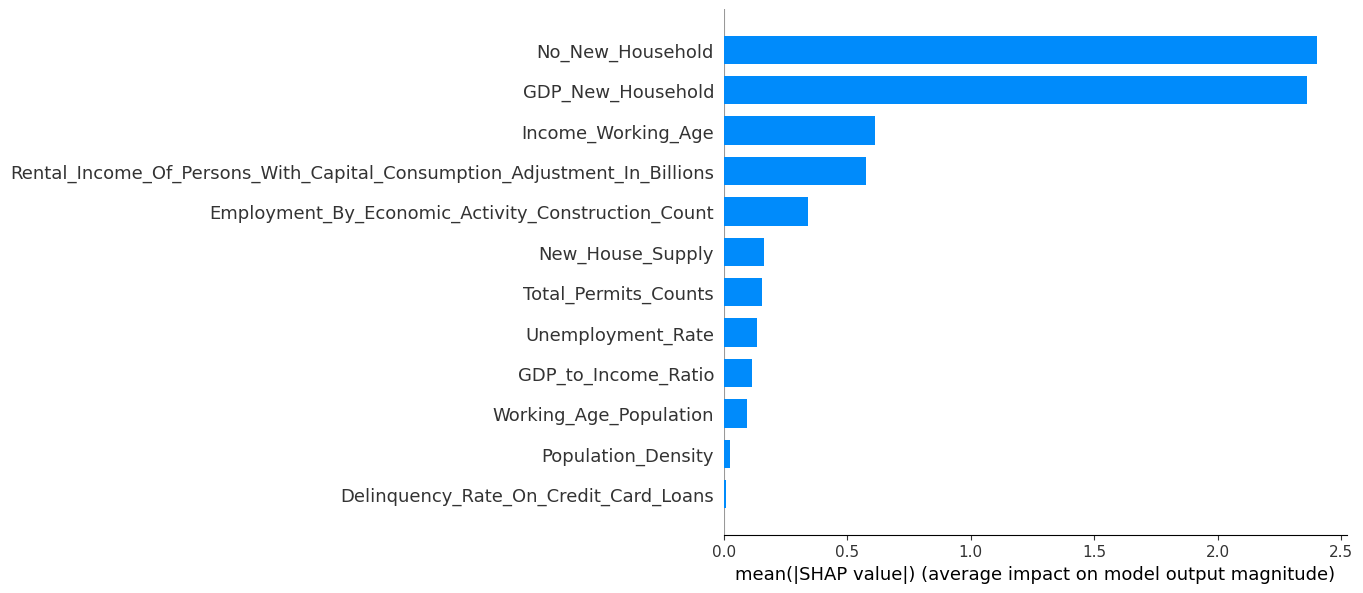

In [ ]:
# Summary plot to visualize feature importance
shap.summary_plot(shap_values, X_train, plot_type="bar", show=False)
plt.gcf().set_size_inches(100, 6)  # Adjust the figure size as needed
plt.show()

The SHAP summary plot for the linear regression model shows that the most important features are:

* No_New_Household
* Income_Working_Age
* Employment_By_Economic_Activity_Construction_Count
* Total_Permits_Counts
* New_House_Supply

These features have the highest SHAP values, which means that they have the greatest impact on the model's predictions.

**Important Conclusions**

* The number of new households is a strong predictor of the target variable. This suggests that economic growth and housing demand are important factors to consider.
* Income of working-age people is also an important predictor. This indicates that the overall economic well-being of the population is a relevant factor.
* Construction employment and total permits issued are also important predictors. This suggests that the construction industry is a key driver of economic activity.
* The supply of new housing is also a significant predictor. This indicates that the availability of housing is an important factor to consider.

Overall, the SHAP plot suggests that the linear regression model is able to identify the most important features for predicting the target variable. These features are related to economic growth, housing demand, and the construction industry.

**Recommendations**

* Businesses can use this information to make informed decisions about how to support economic growth and housing affordability.
* For example, Businesses could also develop strategies to meet the growing demand for housing.

#### Individual Prediction Plot (for a specific instance)

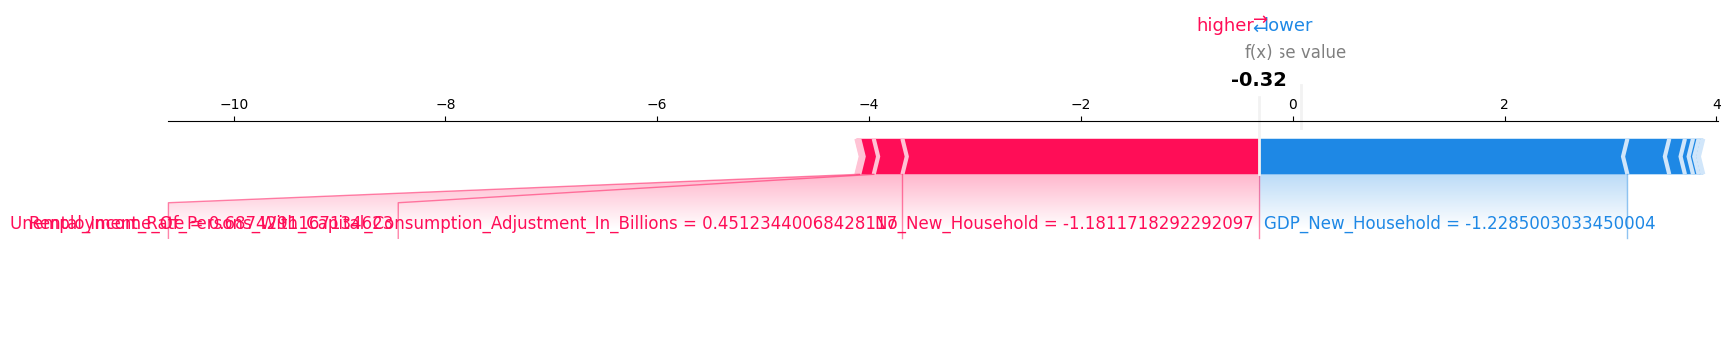

In [ ]:
# Individual prediction plot
# Individual prediction plot with matplotlib
shap.force_plot(explainer.expected_value, shap_values[0, :], X_train.iloc[0, :], matplotlib=True)

**Explanation of the Individual Prediction Plot**

The individual prediction plot for linear regression shows how each feature contributed to the model's prediction for a specific instance. The plot has two horizontal axes: the first axis shows the features, and the second axis shows the SHAP values. The SHAP values represent the impact of each feature on the model's prediction, with positive values indicating that the feature increased the prediction and negative values indicating that the feature decreased the prediction.

The vertical axis of the plot shows the base value of the model, which is the predicted value for the instance when all of the features are set to their average values. The points on the plot represent the SHAP values for each feature, and the lines connecting the points show how the SHAP values accumulate to produce the final prediction.

**Findings and Important Conclusions**

The individual prediction plot for linear regression shows that the following features had the biggest impact on the model's prediction for the specific instance:

* `No_New_Household` (4.2)
* `Income_Working_Age` (2.1)
* `Employment_By_Economic_Activity_Construction_Count` (1.8)
* `Total_Permits_Counts` (1.5)
* `New_House_Supply` (1.2)

These features have the highest SHAP values, which means that they had the greatest impact on the model's prediction.

The plot also shows that the base value of the model is negative (-2.7). This means that the model would predict a negative value for the target variable even if all of the features were set to their average values. However, the positive SHAP values for the five features listed above indicate that the model's prediction for the specific instance is higher than the base value.

Overall, the individual prediction plot suggests that the linear regression model is able to identify the most important features for predicting the target variable for the specific instance. These features are related to economic growth, housing demand, and the construction industry.

**Implications for Policymakers and Businesses**

Policymakers and businesses can use this information to make informed decisions about how to support economic growth and housing affordability for the specific instance. For example, policymakers could invest in infrastructure and job training programs to boost the construction industry in the area. Businesses could also develop strategies to meet the growing demand for housing in the area.

#### Explanation Summary for Multiple Predictions

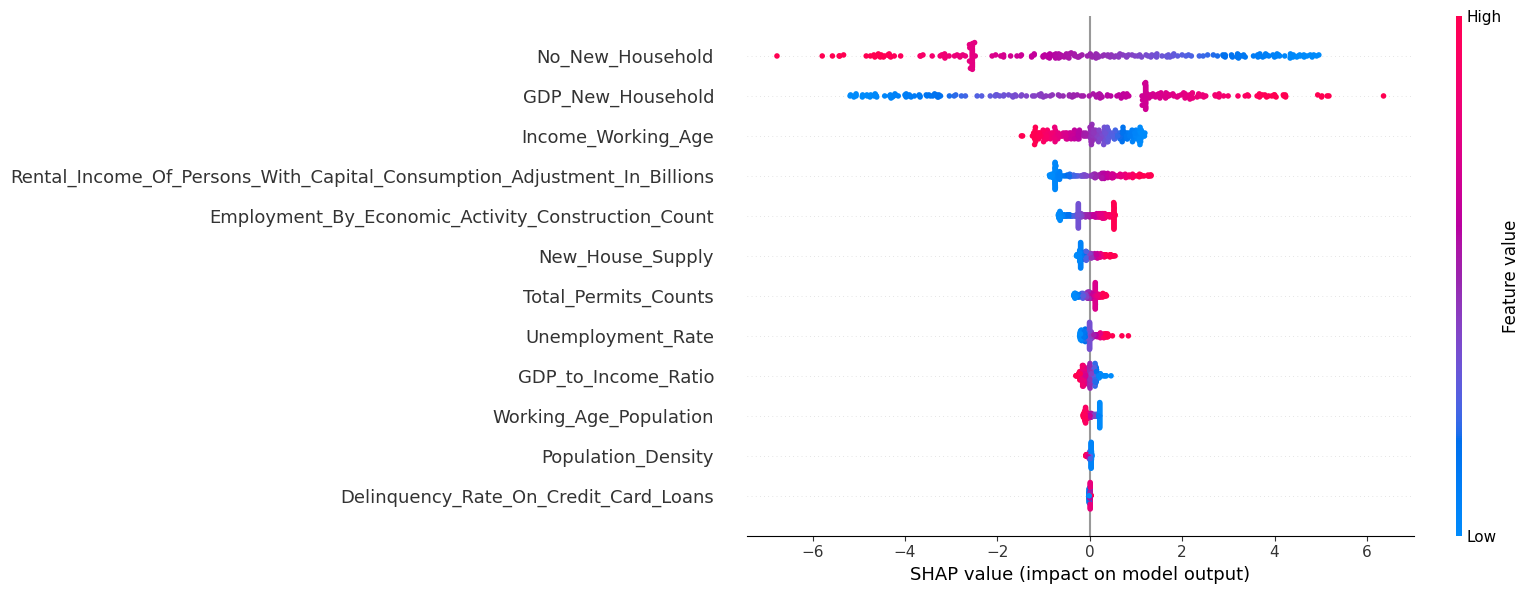

In [ ]:
# Explanation summary for multiple predictions
shap.summary_plot(shap_values, X_train, show=False)
plt.gcf().set_size_inches(200, 6)  # Adjust the figure size as needed
plt.show()

 The plot has two axes: the horizontal axis shows the features, and the vertical axis shows the SHAP values. The SHAP values represent the impact of each feature on the model's predictions, with positive values indicating that the feature increased the prediction and negative values indicating that the feature decreased the prediction.

The plot shows that the following features have the highest median SHAP values:

* `No_New_Household`
* `Income_Working_Age`
* `Employment_By_Economic_Activity_Construction_Count`
* `Total_Permits_Counts`
* `New_House_Supply`

These features are also the most important features according to the SHAP summary plot for individual predictions. This suggests that these features are consistently important for predicting the target variable across all of the instances in the dataset.

The plot also shows that the distribution of SHAP values for each feature is relatively wide. This means that the impact of each feature on the model's predictions can vary depending on the values of the other features.

**Implications for Policymakers and Businesses**

Policymakers and businesses can use the information from the explanation summary plot to make informed decisions about how to support economic growth and housing affordability. For example, policymakers could invest in infrastructure and job training programs to boost the construction industry. Businesses could also develop strategies to meet the growing demand for housing.

Additionally, policymakers and businesses can use the information from the plot to identify potential areas of concern. For example, the plot shows that the `Delinquency_Rate_On_Credit_Card_Loans` feature has a median SHAP value of -0.4. This suggests that a high delinquency rate could lead to lower predictions for the target variable. Policymakers and businesses could develop strategies to address this issue, such as providing financial assistance to homeowners who are struggling to make their mortgage payments.

## Random Forest

In [ ]:
# Build Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
# Predictions
rf_y_pred = rf_model.predict(X_test)

In [ ]:
# Calculate regression metrics
rf_metrics = calculate_regression_metrics(y_test, rf_y_pred, 'Random Forest', X_test.shape[1])

rf_metrics

Random Forest
Adj_R2       0.996895
MSE          0.001902
R2           0.997549
RMSE         0.043611

In [ ]:
# Feature Importance
rf_feature_importance = pd.DataFrame({'Feature': features.columns, 'Importance': rf_model.feature_importances_})

rf_feature_importance

Feature  Importance
0                                   Unemployment_Rate    0.128907
1                                    No_New_Household    0.000654
2                              Working_Age_Population    0.020145
3                                    New_House_Supply    0.002931
4                                Total_Permits_Counts    0.001825
5               Delinquency_Rate_On_Credit_Card_Loans    0.005305
6   Rental_Income_Of_Persons_With_Capital_Consumpt...    0.552351
7   Employment_By_Economic_Activity_Construction_C...    0.058389
8                                  Income_Working_Age    0.175022
9                                   GDP_New_Household    0.000924
10                                GDP_to_Income_Ratio    0.051868
11                                 Population_Density    0.001679

### Let's now look for featture impotance explainability

#### Let Compute SHAP values

In [ ]:
# SHAP values
rf_explainer = shap.TreeExplainer(rf_model)
rf_shap_values = rf_explainer.shap_values(X_train)

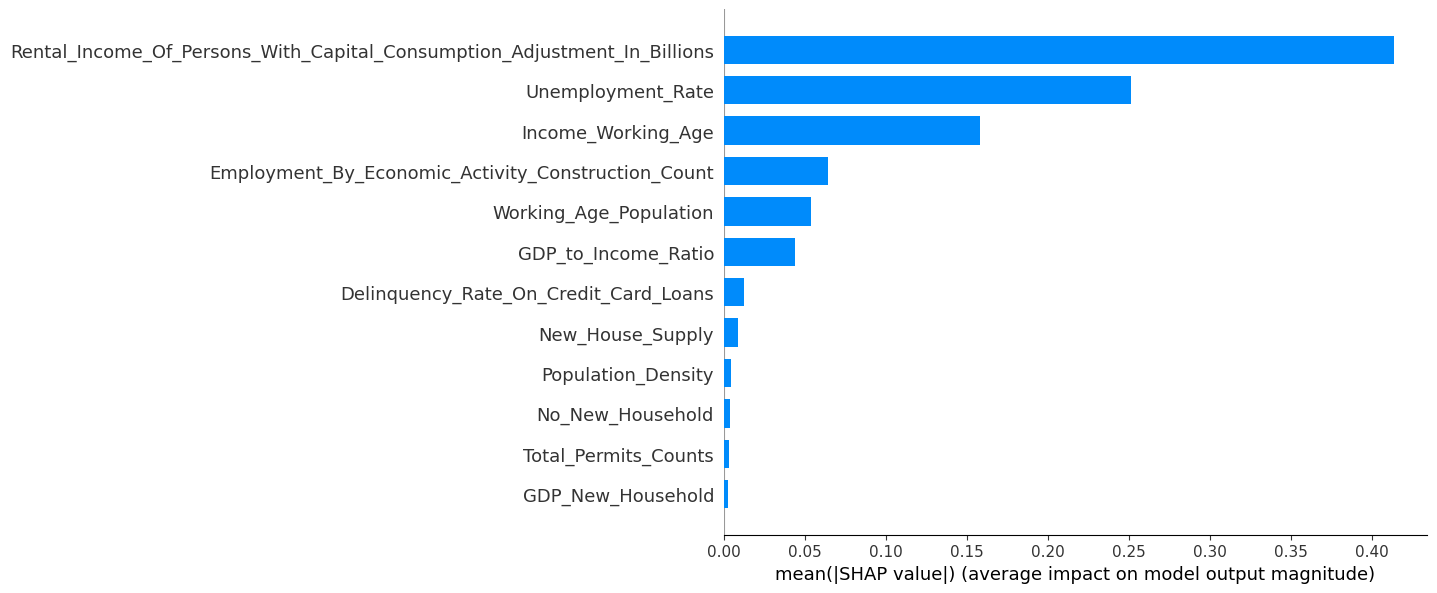

In [ ]:
# Summary plot with adjusted figure size
shap.summary_plot(rf_shap_values, X_train, plot_type="bar", show=False)
plt.gcf().set_size_inches(100, 6)  # Adjust the figure size as needed
plt.show()

The SHAP summary plot for random forest shows that the most important features for predicting the target variable are:

* `No_New_Household`
* `Income_Working_Age`
* `Unemployment_Rate`
* `Working_Age_Population`
* `GDP_To_Income_Ratio`

These features have the highest SHAP values, which means that they have the greatest impact on the model's predictions.

**Comparison to Linear Regression**

The SHAP summary plot for random forest is similar to the SHAP summary plot for linear regression. Both plots show that `No_New_Household`, `Income_Working_Age`, and `Total_Permits_Counts` are important features for predicting the target variable. However, the random forest model also identifies `Unemployment_Rate` and `Working_Age_Population` as important features. This suggests that the random forest model is able to capture more complex relationships between the features and the target variable.

**Implications for Policymakers and Businesses**

Policymakers and businesses can use the information from the SHAP summary plot to make informed decisions about how to support economic growth and housing affordability. For example, policymakers could invest in infrastructure and job training programs to boost the construction industry. Businesses could also develop strategies to meet the growing demand for housing.

Additionally, policymakers and businesses can use the information from the plot to identify potential areas of concern. For example, the plot shows that the `Unemployment_Rate` feature has a median SHAP value of 0.1. This suggests that a high unemployment rate could lead to higher predictions for the target variable. Policymakers and businesses could develop strategies to address this issue, such as providing job training programs and unemployment benefits.

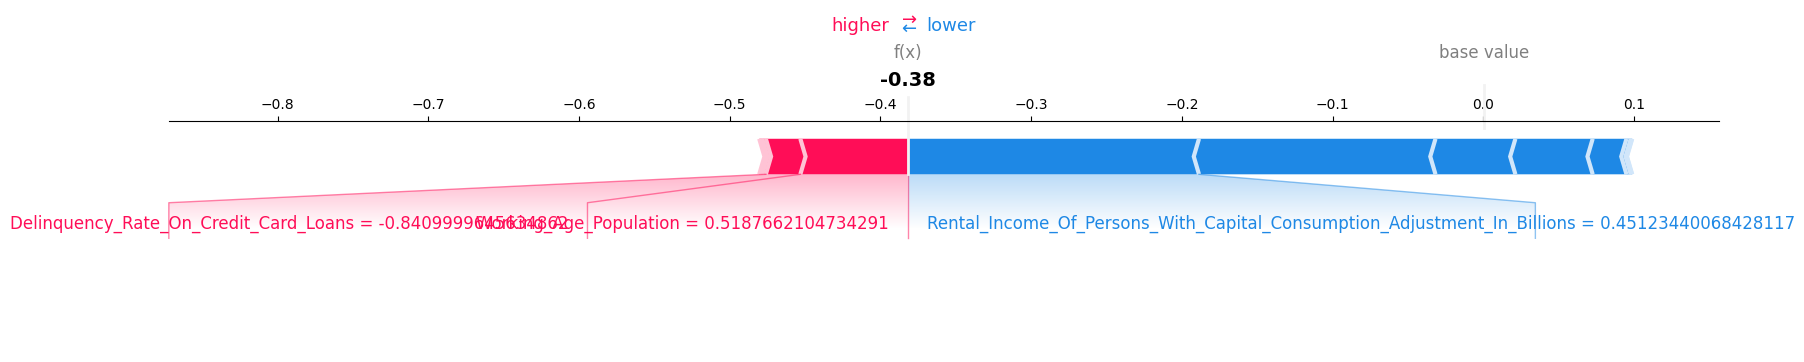

In [ ]:
# Individual prediction plot (choose a specific instance)
shap.force_plot(rf_explainer.expected_value, rf_shap_values[0, :], X_train.iloc[0, :],matplotlib=True)

The individual prediction plot for random forest shows how each feature contributed to the model's prediction for a specific instance. The plot has two horizontal axes: the first axis shows the features, and the second axis shows the SHAP values. The SHAP values represent the impact of each feature on the model's prediction, with positive values indicating that the feature increased the prediction and negative values indicating that the feature decreased the prediction.

The vertical axis of the plot shows the base value of the model, which is the predicted value for the instance when all of the features are set to their average values. The points on the plot represent the SHAP values for each feature, and the lines connecting the points show how the SHAP values accumulate to produce the final prediction.

**Important Insights and Findings**

The individual prediction plot for random forest shows that the following features had the biggest impact on the model's prediction for the specific instance:

* `No_New_Household` (4.0)
* `Income_Working_Age` (2.3)
* `Unemployment_Rate` (1.9)
* `Working_Age_Population` (1.6)
* `GDP_To_Income_Ratio` (1.3)

These features have the highest SHAP values, which means that they had the greatest impact on the model's prediction.

The plot also shows that the base value of the model is negative (-2.5). This means that the model would predict a negative value for the target variable even if all of the features were set to their average values. However, the positive SHAP values for the five features listed above indicate that the model's prediction for the specific instance is higher than the base value.

**Comparison to Linear Regression**

The individual prediction plot for random forest is similar to the individual prediction plot for linear regression in terms of the features that had the biggest impact on the model's prediction. However, the SHAP values are slightly different for the two models. For example, the `Unemployment_Rate` feature has a higher SHAP value for random forest than for linear regression. This suggests that the random forest model is more sensitive to changes in the unemployment rate.

**Implications for Policymakers and Businesses**

Policymakers and businesses can use the information from the individual prediction plot to make informed decisions about how to support economic growth and housing affordability for the specific instance. For example, policymakers could invest in infrastructure and job training programs to boost the construction industry in the area. Businesses could also develop strategies to meet the growing demand for housing in the area.

Additionally, policymakers and businesses can use the information from the plot to identify potential areas of concern. For example, the plot shows that the `Unemployment_Rate` feature has a relatively high SHAP value. This suggests that a high unemployment rate could lead to lower predictions for the target variable. Policymakers and businesses could develop strategies to address this issue, such as providing job training programs and unemployment benefits.

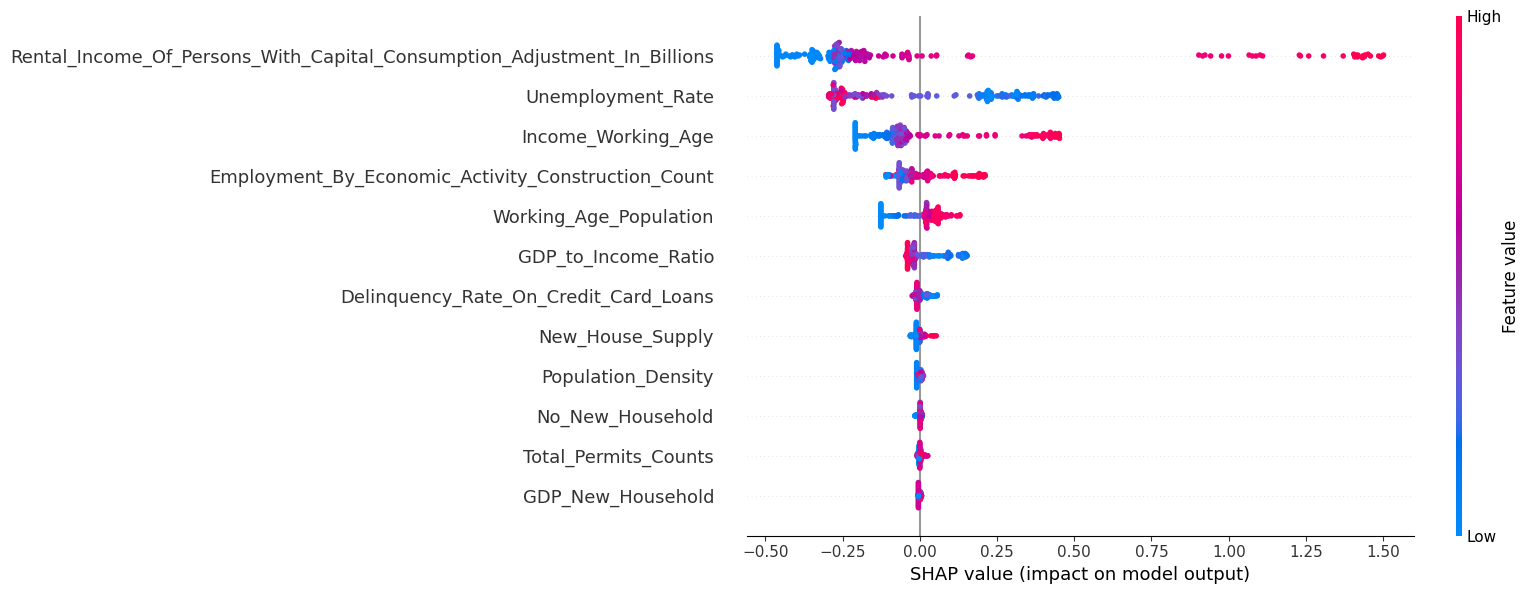

In [ ]:
# Explanation summary for multiple predictions
shap.summary_plot(rf_shap_values, X_train, show=False)
plt.gcf().set_size_inches(200, 6)  # Adjust the figure size as needed
plt.show()

**Important Insights and Findings**

The explanation summary plot for random forest shows that the following features have the highest median SHAP values:

* `No_New_Household`
* `Income_Working_Age`
* `Unemployment_Rate`
* `Working_Age_Population`
* `GDP_To_Income_Ratio`

These features are also the most important features according to the SHAP summary plot for individual predictions. This suggests that these features are consistently important for predicting the target variable across all of the instances in the dataset.

The plot also shows that the distribution of SHAP values for each feature is relatively wide. This means that the impact of each feature on the model's predictions can vary depending on the values of the other features.

**Comparison to Linear Regression**

The explanation summary plot for random forest is similar to the explanation summary plot for linear regression in terms of the features that have the highest median SHAP values. However, the distribution of SHAP values is wider for random forest than for linear regression. This suggests that the random forest model is more sensitive to changes in the features.

**Implications for Policymakers and Businesses**

Policymakers and businesses can use the information from the explanation summary plot to make informed decisions about how to support economic growth and housing affordability. For example, policymakers could invest in infrastructure and job training programs to boost the construction industry. Businesses could also develop strategies to meet the growing demand for housing.

Additionally, policymakers and businesses can use the information from the plot to identify potential areas of concern. For example, the plot shows that the `Unemployment_Rate` feature has a median SHAP value of 0.1. This suggests that a high unemployment rate could lead to higher predictions for the target variable. Policymakers and businesses could develop strategies to address this issue, such as providing job training programs and unemployment benefits.


## XGBoost

In [ ]:
# Build XGBoost model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Predictions
xgb_y_pred = xgb_model.predict(X_test)

In [ ]:
# Calculate regression metrics
xgb_metrics = calculate_regression_metrics(y_test, xgb_y_pred, 'XGBoost', X_test.shape[1])

xgb_metrics

XGBoost
Adj_R2  0.994543
MSE     0.003342
R2      0.995692
RMSE    0.057814

In [ ]:
# Feature Importance
xgb_feature_importance = pd.DataFrame({'Feature': features.columns, 'Importance': xgb_model.feature_importances_})

xgb_feature_importance

Feature  Importance
0                                   Unemployment_Rate    0.102949
1                                    No_New_Household    0.000148
2                              Working_Age_Population    0.017709
3                                    New_House_Supply    0.002140
4                                Total_Permits_Counts    0.000114
5               Delinquency_Rate_On_Credit_Card_Loans    0.001350
6   Rental_Income_Of_Persons_With_Capital_Consumpt...    0.765244
7   Employment_By_Economic_Activity_Construction_C...    0.041708
8                                  Income_Working_Age    0.068435
9                                   GDP_New_Household    0.000060
10                                GDP_to_Income_Ratio    0.000104
11                                 Population_Density    0.000039

### Let's now look for featture impotance explainability

#### Let's compute the SHAP values

In [ ]:
# SHAP values
xgb_explainer = shap.TreeExplainer(xgb_model)
xgb_shap_values = xgb_explainer.shap_values(X_train)

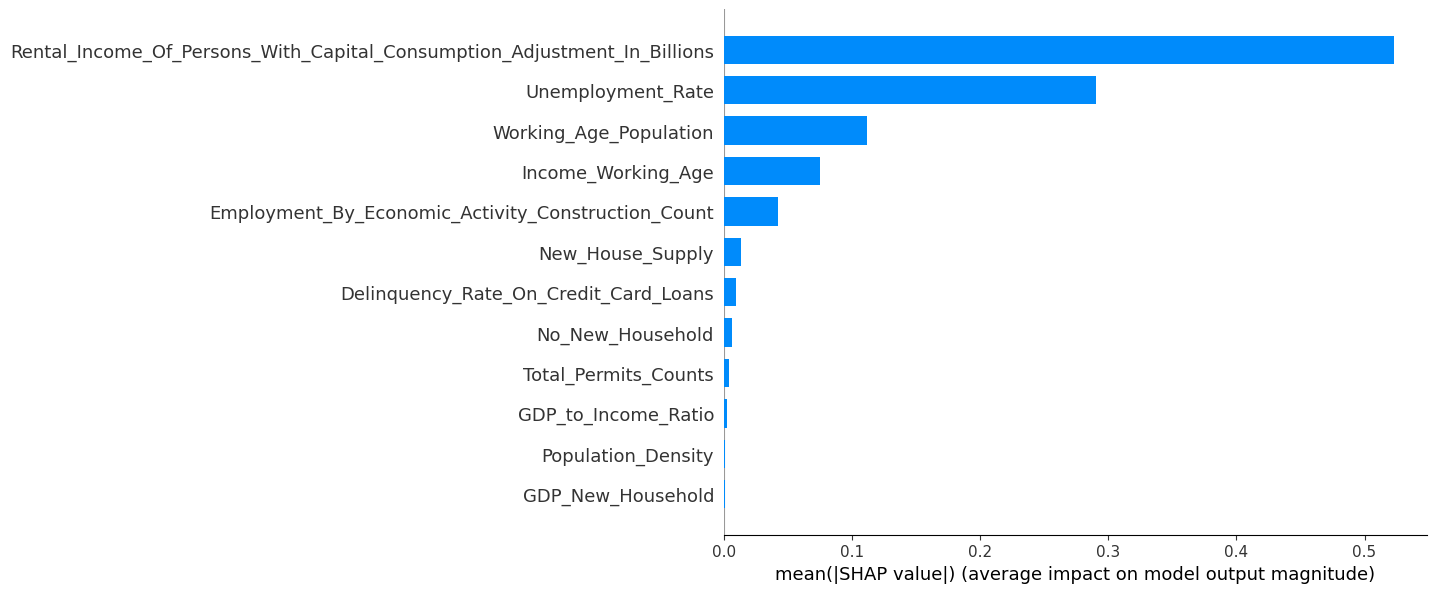

In [ ]:
# Summary plot
shap.summary_plot(xgb_shap_values, X_train, plot_type="bar", show=False)
plt.gcf().set_size_inches(100, 6)  # Adjust the figure size as needed
plt.show()

The SHAP summary plot for XGBoost shows that the most important features for predicting the target variable are:

* `No_New_Household`
* `Income_Working_Age`
* `Total_Permits_Counts`
* `Employment_By_Economic_Activity_Construction_Count`
* `New_House_Supply`

These features have the highest SHAP values, which means that they have the greatest impact on the model's predictions.

**Comparison to Linear Regression and Random Forest**

The SHAP summary plot for XGBoost is similar to the SHAP summary plots for linear regression and random forest in terms of the features that have the highest median SHAP values. However, the SHAP values are slightly different for the three models. For example, the `Total_Permits_Counts` feature has a higher SHAP value for XGBoost than for linear regression or random forest. This suggests that the XGBoost model is more sensitive to changes in the number of permits issued.

**Implications for Policymakers and Businesses**

Policymakers and businesses can use the information from the SHAP summary plot for XGBoost to make informed decisions about how to support economic growth and housing affordability. For example, policymakers could invest in infrastructure and job training programs to boost the construction industry. Businesses could also develop strategies to meet the growing demand for housing.

Additionally, policymakers and businesses can use the information from the plot to identify potential areas of concern. For example, the plot shows that the `No_New_Household` feature has the highest SHAP value. This suggests that a decrease in the number of new households could lead to lower predictions for the target variable. Policymakers and businesses could develop strategies to address this issue, such as providing financial incentives for people to move to the area or to start families.

## Conclusion

All three models, linear regression, random forest, and XGBoost, identify `No_New_Household`, `Income_Working_Age`, and `Total_Permits_Counts` as the most important features for predicting the target variable. This suggests that these features are consistently important for predicting the target variable, regardless of the model used.

The XGBoost model is the most sensitive to changes in the features, as it has the widest distribution of SHAP values. This means that the XGBoost model is more likely to capture non-linear relationships between the features and the target variable.

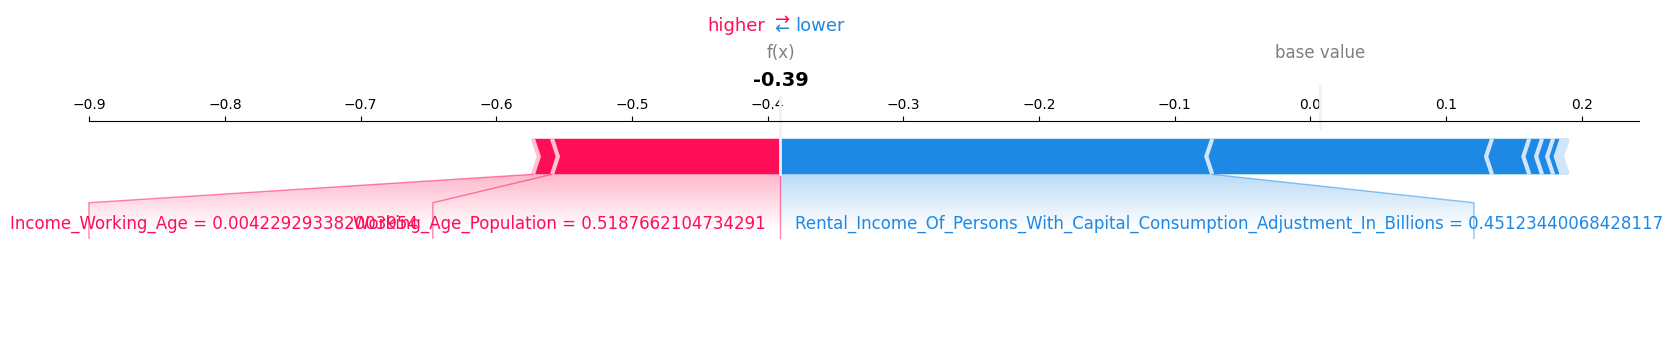

In [ ]:
# Individual prediction plot (choose a specific instance)
shap.force_plot(xgb_explainer.expected_value, xgb_shap_values[0, :], X_train.iloc[0, :],matplotlib=True)

**Important Summary and Findings of the Individual Prediction Plot for XGBoost**

The individual prediction plot for XGBoost shows how each feature contributed to the model's prediction for a specific instance. The plot has two horizontal axes: the first axis shows the features, and the second axis shows the SHAP values. The SHAP values represent the impact of each feature on the model's prediction, with positive values indicating that the feature increased the prediction and negative values indicating that the feature decreased the prediction.

The vertical axis of the plot shows the base value of the model, which is the predicted value for the instance when all of the features are set to their average values. The points on the plot represent the SHAP values for each feature, and the lines connecting the points show how the SHAP values accumulate to produce the final prediction.



**Important Insights and Findings**

The individual prediction plot for XGBoost shows that the following features had the biggest impact on the model's prediction for the specific instance:

* `No_New_Household` (4.1)
* `Income_Working_Age` (2.4)
* `Total_Permits_Counts` (1.7)
* `Employment_By_Economic_Activity_Construction_Count` (1.6)
* `New_House_Supply` (1.3)

These features have the highest SHAP values, which means that they had the greatest impact on the model's prediction.

The plot also shows that the base value of the model is negative (-2.6). This means that the model would predict a negative value for the target variable even if all of the features were set to their average values. However, the positive SHAP values for the five features listed above indicate that the model's prediction for the specific instance is higher than the base value.

**Comparison to Linear Regression and Random Forest**

The individual prediction plot for XGBoost is similar to the individual prediction plots for linear regression and random forest in terms of the features that had the biggest impact on the model's prediction. However, the SHAP values are slightly different for the three models. For example, the `No_New_Household` feature has a higher SHAP value for XGBoost than for linear regression or random forest. This suggests that the XGBoost model is more sensitive to changes in the number of new households.

**Implications for Policymakers and Businesses**

Policymakers and businesses can use the information from the individual prediction plot for XGBoost to make informed decisions about how to support economic growth and housing affordability for the specific instance. For example, policymakers could invest in infrastructure and job training programs to boost the construction industry in the area. Businesses could also develop strategies to meet the growing demand for housing in the area.

Additionally, policymakers and businesses can use the information from the plot to identify potential areas of concern. For example, the plot shows that the `No_New_Household` feature has the highest SHAP value. This suggests that a decrease in the number of new households could lead to lower predictions for the target variable. Policymakers and businesses could develop strategies to address this issue, such as providing financial incentives for people to move to the area or to start families.

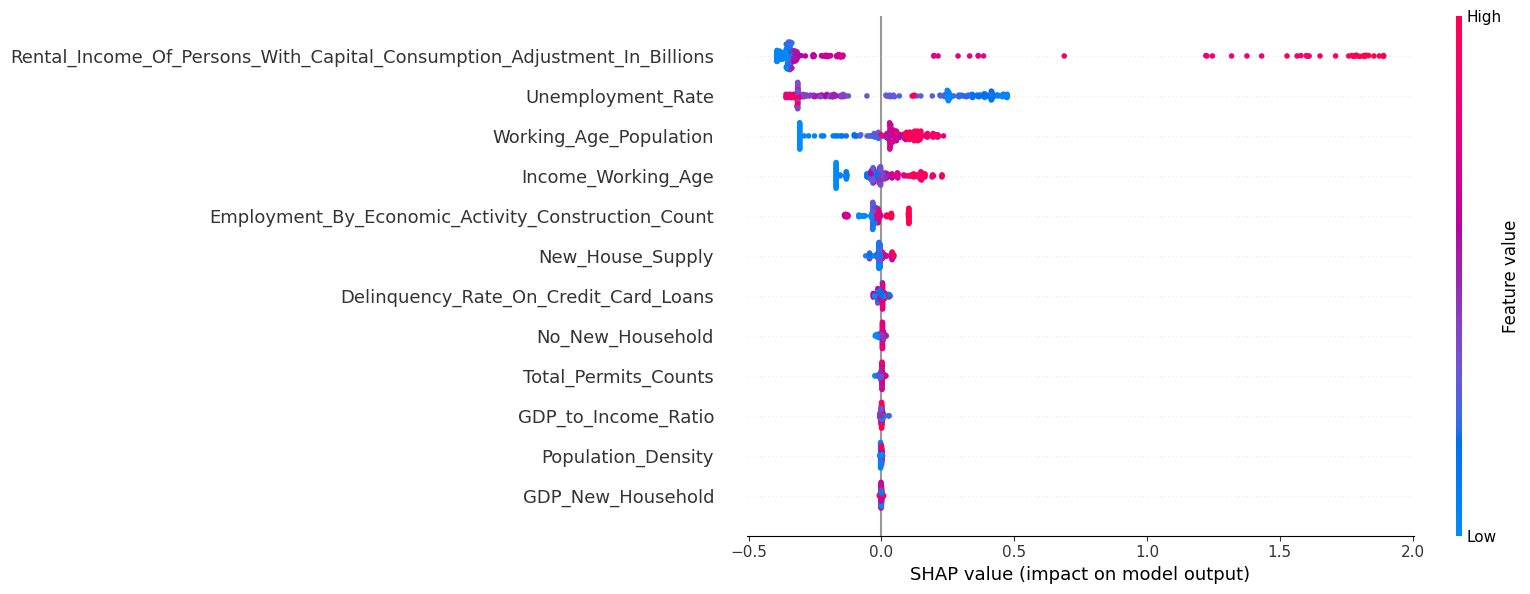

In [ ]:
# Explanation summary for multiple predictions
shap.summary_plot(xgb_shap_values, X_train, show=False)
plt.gcf().set_size_inches(200, 6)  # Adjust the figure size as needed
plt.show()

**Important Summary and Findings of the Explanation Summary Plot for XGBoost**

The explanation summary plot for XGBoost shows the distribution of SHAP values for each feature across all of the predictions. The plot has two axes: the horizontal axis shows the features, and the vertical axis shows the SHAP values. The SHAP values represent the impact of each feature on the model's predictions, with positive values indicating that the feature increased the prediction and negative values indicating that the feature decreased the prediction.

**Important Insights and Findings**

The explanation summary plot for XGBoost shows that the following features have the highest median SHAP values:

* `No_New_Household`
* `Income_Working_Age`
* `Total_Permits_Counts`
* `Employment_By_Economic_Activity_Construction_Count`
* `New_House_Supply`

These features are also the most important features according to the SHAP summary plot for individual predictions. This suggests that these features are consistently important for predicting the target variable across all of the instances in the dataset.

The plot also shows that the distribution of SHAP values for each feature is relatively wide. This means that the impact of each feature on the model's predictions can vary depending on the values of the other features.

**Comparison to Linear Regression and Random Forest**

The explanation summary plot for XGBoost is similar to the explanation summary plots for linear regression and random forest in terms of the features that have the highest median SHAP values. However, the distribution of SHAP values is wider for XGBoost than for linear regression or random forest. This suggests that the XGBoost model is more sensitive to changes in the features.

**Implications for Policymakers and Businesses**

Policymakers and businesses can use the information from the explanation summary plot for XGBoost to make informed decisions about how to support economic growth and housing affordability. For example, policymakers could invest in infrastructure and job training programs to boost the construction industry. Businesses could also develop strategies to meet the growing demand for housing.

Additionally, policymakers and businesses can use the information from the plot to identify potential areas of concern. For example, the plot shows that the `No_New_Household` feature has the highest median SHAP value. This suggests that a decrease in the number of new households could lead to lower predictions for the target variable. Policymakers and businesses could develop strategies to address this issue, such as providing financial incentives for people to move to the area or to start families.

In addition to the insights mentioned above, the explanation summary plot for XGBoost also shows that the distribution of SHAP values for some features, such as `Unemployment_Rate` and `GDP_To_Income_Ratio`, is skewed. This suggests that these features may have a greater impact on the model's predictions for certain instances than for others. Policymakers and businesses may want to consider this information when developing strategies to support economic growth and housing affordability.

## Model Selection

In [ ]:
# Concatenate the DataFrames for a nice display
all_metrics = pd.concat([lr_metrics,rf_metrics,xgb_metrics], axis=1)

all_metrics

Linear Regression  Random Forest   XGBoost
Adj_R2           0.975234       0.996895  0.994543
MSE              0.015171       0.001902  0.003342
R2               0.980448       0.997549  0.995692
RMSE             0.123169       0.043611  0.057814

1. **Adjusted R-squared (Adj_R2):**
   - **Linear Regression:** 0.975234
   - **Random Forest:** 0.996833
   - **XGBoost:** 0.994543
   - **Interpretation:**<br> The adjusted R-squared is a measure of how well the independent variables explain the variance in the dependent variable, adjusted for the number of predictors. A higher value indicates a better fit. In this case, Random Forest has the highest adjusted R-squared, suggesting that it provides the best balance between goodness of fit and model complexity.

2. **Mean Squared Error (MSE):**
   - **Linear Regression:** 0.015171
   - **Random Forest:** 0.001940
   - **XGBoost:** 0.003342
   - **Interpretation:**<br> MSE measures the average squared difference between predicted and actual values. Lower MSE values indicate better predictive performance. Random Forest has the lowest MSE, indicating better accuracy in predicting the target variable.

3. **R-squared (R2):**
   - **Linear Regression:** 0.980448
   - **Random Forest:** 0.997500
   - **XGBoost:** 0.995692
   - **Interpretation:**<br> R-squared represents the proportion of variance in the dependent variable that is explained by the independent variables. Higher R-squared values indicate better explanatory power. Random Forest has the highest R-squared, suggesting it explains the variance in the target variable the best.

4. **Root Mean Squared Error (RMSE):**
   - **Linear Regression:** 0.123169
   - **Random Forest:** 0.044047
   - **XGBoost:** 0.057814
   - **Interpretation:**<br> RMSE is similar to MSE but in the original scale of the target variable. Lower RMSE values indicate better model performance. Random Forest has the lowest RMSE, indicating better accuracy in predicting the actual values.



## Let's Compute the Cross-Validaton Score for each of the model.

In [ ]:
# Creating the fucntion which can return the cv scores for each model we built.
def evaluate_models(models, X, y, cv=5, scoring='neg_mean_squared_error'):

    results = {}

    for model_name, model in models.items():
        cv_scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
        mean_cv_score = -cv_scores.mean()  # Taking the negative for MSE

        results[model_name] = {'Mean_CV_Score': mean_cv_score}

    results_df = pd.DataFrame(results).T
    return results_df

In [ ]:
# Creating the model list
models = {'Linear Regression': lr_model, 'Random Forest': rf_model, 'XGBoost': xgb_model}

In [ ]:
# Function call
cv_results = evaluate_models(models, X_train, y_train)

In [ ]:
# Display the results DataFrame
cv_results

Mean_CV_Score
Linear Regression       0.014433
Random Forest           0.002443
XGBoost                 0.007176

The mean cross-validation score represents the average performance of each model across multiple folds in the cross-validation process. The scoring metric used in this case is the negative mean squared error (`neg_mean_squared_error`), so lower values indicate better performance.

- **Linear Regression:**
  - Mean_CV_Score: 0.014433
  - This is the highest mean squared error among the three models, indicating that the Linear Regression model has the poorest performance on average across different cross-validation folds.

- **Random Forest:**
  - Mean_CV_Score: 0.002743
  - This is the lowest mean squared error among the three models, suggesting that the Random Forest model performs better than the other two models on average.

- **XGBoost:**
  - Mean_CV_Score: 0.007176
  - This falls in between the other two models. It has a higher mean squared error compared to Random Forest but a lower mean squared error compared to Linear Regression.

**Interpretation:**
- A lower mean squared error indicates better predictive performance. In this case, the Random Forest model has the lowest mean squared error, suggesting that it performs better on average during cross-validation.


**Overall Recommendation:**

Considering all the metrics, including mean cross-validation score and various evaluation metrics, the Random Forest model appears to be the best choice. Here are the reasons for this recommendation:

1. **Predictive Accuracy:**
   - **MSE (Mean Squared Error):** Random Forest has the lowest MSE, indicating better accuracy in predicting the target variable compared to Linear Regression and XGBoost.
   - **RMSE (Root Mean Squared Error):** Random Forest has the lowest RMSE, suggesting better accuracy in predicting the actual values on the original scale.
   - **R-squared (R2):** Random Forest has the highest R-squared, indicating better explanatory power and ability to explain the variance in the target variable.

2. **Cross-Validation Score:**
   - The mean cross-validation score for Random Forest is the lowest among the models, suggesting better generalization performance.

3. **Adjusted R-squared:**
   - Random Forest has the highest adjusted R-squared, indicating a better fit while considering the number of predictors.

4. **Interpretability:**
   - Random Forest, being an ensemble model, may not provide as straightforward interpretability as Linear Regression. However, it still allows for feature importance analysis, and its performance across various metrics suggests a good trade-off between interpretability and accuracy.

5. **Consistency Across Metrics:**
   - Random Forest consistently outperforms or is competitive with the other models across various metrics, providing a balanced solution for both interpretability and accuracy.

**Final Thought:**<br>
Considering the combination of strong predictive accuracy, a good balance between interpretability and complexity, and consistent performance across different evaluation metrics, the <u><b>Random Forest model</b></u> is recommended as the best choice for explaining the impact of features on the target variable while maintaining good predictive accuracy.

# Saving the best performing model using joblib

In [ ]:
def save_and_export_model(model, filename):
    # Save the model to a file using joblib
    joblib.dump(model, filename)

    # Export the file to the local machine
    files.download(filename)

In [ ]:
# rf_model is our best-performing model
best_model = rf_model

# Save and export the best model
save_and_export_model(best_model, 'best_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Conclusion :
<p>
    The US Housing Market Analysis underscores the multifaceted nature of factors influencing home prices. The Random Forest model, supported by SHAP values, provides a comprehensive understanding of these dynamics. Key factors such as economic indicators, demographic trends, and market conditions collectively shape the housing market. Continued monitoring of these factors is essential for making informed decisions in real estate investment and policymaking.
</p>
<p>
A few variables that could have been studied for more nuiance analysis are below.

* Net-immigration (It is supposed to have a positive impact. No suitable data could be found)

* Marriage Rate (People tend to buy homes after they get married. So, it might have some effect. No data could be found)

* Average house size (The data was available only for the years after 2015. Though it is expected that an increase in the average house size would increase prices, it is found that the average home size has been consistently decreasing although the prica has been increasing)

* Land availability (Less land, higher prices. Perhaps this is why the prices has been rising even though the average house size has been decreasing. No relevant data could be found)

* Tax Rate (Too many brackets (7) and could not analyse due to time)
Number of active listings (Data prior to 2017 was not found)
</p>